# 6.1 ESA Sourcing open data - Part 2

## Table of Contents

### 01. Import libraries and datasets

### 02. Verify dataset import results

### 03. Wrangle variables datatype

### 04. Data cleaning

> #### 04.01 Missing values

> #### 04.02 Duplicates

> #### 04.03 Mixed datatypes

> #### 04.04 Inconsistent text formatting or spelling variations

> #### 04.05 Trim whitespace

### 05. Preliminary data exploration

> #### 05.01 Descriptive statistics for raw data

>> ##### OECD Countries (22)

>> ##### FX, VIX, Commodities

> #### 05.02 First-step data transformation to log returns, first differences and % changes

>> #### OECD countries subset: United States, Germany, Japan, South Korea, Australia, Norway and Switzerland

>> #### FX pairs, VIX, Commodities

## 01. Import libraries and datasets

In [6]:
# Import libraries

import pandas as pd
import numpy as np
import os

In [9]:
# Create string path to main project folder, to use with a Python shortcut for importing files

path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'

# Import first dataset

fx_vix_comm = pd.read_excel(os.path.join(path, 'Data', 'Original Data', 'fx_vix_comm_shock.xlsx'), index_col = False)

# Import second dataset

oecd_ctry = pd.read_excel(os.path.join(path, 'Data', 'Original Data', 'oecd_ctry_shock.xlsx'), index_col = False)

## 02. Verify dataset import results

#### First dataframe: fx_vix_comm

In [16]:
# Confirm dimensions of first dataset

fx_vix_comm.shape

(244, 42)

In [22]:
# Display first 3 rows

fx_vix_comm.head(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg,brent_avg,nat_gas_eu_avg,lng_asia_avg,metals_idx_avg,iron_ore_avg,copper_avg,aluminum_avg,gold_oz_usd,food_idx_avg
0,2005-01-01,2005,1,2005-01,Jan,0,0,0,0,0,...,46.84,44.174762,5.06,5.82,77.734825,28.11,3168.100000,1836.175,424.03,76.506190
1,2005-02-01,2005,2,2005-02,Feb,0,0,0,0,0,...,47.97,45.721000,5.06,6.10,80.009994,28.11,3247.100000,1882.775,423.35,79.020403
2,2005-03-01,2005,3,2005-03,Mar,0,0,0,0,0,...,54.31,53.229130,5.06,6.46,82.993805,28.11,3378.904762,1987.500,433.85,80.939395


In [24]:
# Display middle columns for first 3 rows

fx_vix_comm.loc[0:2, 'boj_int_rate_flag':'wti_avg']

,boj_int_rate_flag,aud_cad,aud_jpy,chf_aud,chf_cad,chf_jpy,eur_aud,eur_cad,eur_chf,eur_gbp,...,gbp_jpy,gbp_usd,usd_aud,usd_cad,usd_chf,usd_jpy,vix_avg,all_comm_idx_avg,energy_idx_avg,wti_avg
0,0,0.928367,78.330489,1.123110,1.041260,87.877385,1.736459,1.609950,1.546160,0.706723,...,192.418289,1.881536,1.305780,1.212269,1.164666,102.284629,13.438000,85.468784,108.963343,46.84
1,0,0.968349,82.004410,1.073662,1.039683,88.042233,1.664662,1.611948,1.550515,0.689548,...,197.954685,1.884889,1.280876,1.240262,1.193159,105.023214,11.708947,87.430914,110.972850,47.97
2,0,0.956241,82.602535,1.084378,1.036934,89.571137,1.680383,1.606823,1.549643,0.692668,...,200.389627,1.905998,1.272960,1.217142,1.173979,105.145969,13.126364,94.599556,124.990154,54.31


In [26]:
# Display more middle columns for first 3 rows

fx_vix_comm.loc[0:2, 'eur_gbp':'gbp_jpy']

,eur_gbp,eur_jpy,eur_usd,gbp_aud,gbp_cad,gbp_jpy
0,0.706723,135.872721,1.330047,2.456750,2.280446,192.418289
1,0.689548,136.499759,1.299736,2.414136,2.337678,197.954685
2,0.692668,138.802196,1.320237,2.425978,2.319854,200.389627


In [28]:
# Display last 3 rows

fx_vix_comm.tail(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg,brent_avg,nat_gas_eu_avg,lng_asia_avg,metals_idx_avg,iron_ore_avg,copper_avg,aluminum_avg,gold_oz_usd,food_idx_avg
241,2025-02-01,2025,2,2025-02,Feb,0,0,0,1,1,...,71.53,75.193000,15.332,14.721,186.290395,108.200000,9330.975000,2655.772500,2894.73,132.053403
242,2025-03-01,2025,3,2025-03,Mar,0,0,0,1,1,...,68.24,71.741429,13.128,13.118,187.309278,103.652381,9735.823333,2651.598571,2983.30,128.971563
243,2025-04-01,2025,4,2025-04,Apr,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Display middle columns for last 3 rows

fx_vix_comm.loc[241:243, 'boj_int_rate_flag':'wti_avg']

,boj_int_rate_flag,aud_cad,aud_jpy,chf_aud,chf_cad,chf_jpy,eur_aud,eur_cad,eur_chf,eur_gbp,...,gbp_jpy,gbp_usd,usd_aud,usd_cad,usd_chf,usd_jpy,vix_avg,all_comm_idx_avg,energy_idx_avg,wti_avg
241,1,0.901444,95.680309,1.755537,1.582514,167.983554,1.652291,1.489444,0.941199,0.831094,...,190.289954,1.253261,1.586433,1.430058,0.903681,151.726269,16.968000,171.957912,183.070594,71.53
242,1,0.904555,93.836516,1.796928,1.625412,168.615143,1.716710,1.552891,0.955356,0.837763,...,192.282790,1.289607,1.589022,1.437326,0.884314,149.104581,21.841429,167.369530,172.721926,68.24
243,1,0.877573,90.604038,1.910427,1.676049,173.028984,1.788142,1.568841,0.936158,0.855579,...,189.321827,1.310822,1.594921,1.399150,0.835084,144.456741,33.181667,NaN,NaN,NaN


In [32]:
# Display more middle columns for last 3 rows

fx_vix_comm.loc[241:243, 'eur_gbp':'gbp_jpy']

,eur_gbp,eur_jpy,eur_usd,gbp_aud,gbp_cad,gbp_jpy
241,0.831094,158.122056,1.041557,1.988117,1.792177,190.289954
242,0.837763,161.089924,1.080430,2.049132,1.853550,192.282790
243,0.855579,161.967255,1.121527,2.089943,1.833750,189.321827


#### Second dataframe: oecd_ctry

In [39]:
# Confirm dimensions of second dataset

oecd_ctry.shape

(5346, 22)

In [41]:
# Display first 3 rows

oecd_ctry.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,cpi_rate,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
0,Australia,2005-01-01,2005,1,2005-01,Jan,0,0,0,0,...,5.25,5.42,5.351842,73.98145,NaN,2.369077,36260.401,3.0,5.072046,20176844.0
1,Australia,2005-02-01,2005,2,2005-02,Feb,0,0,0,0,...,5.25,5.63,5.397750,75.64436,NaN,2.369077,36260.401,3.0,5.083576,20176844.0
2,Australia,2005-03-01,2005,3,2005-03,Mar,0,0,0,0,...,5.49,5.81,5.652619,76.39803,NaN,2.369077,36260.401,3.0,5.162230,20176844.0


In [43]:
# Display middle columns for first 3 rows

oecd_ctry.loc[0:2, 'rus_ukr_war_flag':'int_rate_ovn']

,rus_ukr_war_flag,boj_int_rate_flag,fx_to_usd,int_rate_ovn
0,0,0,1.305748,5.25
1,0,0,1.281180,5.25
2,0,0,1.274161,5.49


In [45]:
# Display last 3 rows

oecd_ctry.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,cpi_rate,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
5343,United States,2025-01-01,2025,1,2025-01,Jan,0,0,0,1,...,4.33,4.33,4.63,183.0461,134.028783,3.000483,89105.202,1.8,4.0,347300000.0
5344,United States,2025-02-01,2025,2,2025-02,Feb,0,0,0,1,...,4.33,4.34,4.45,187.7849,134.624099,2.821549,89105.202,1.8,4.1,347300000.0
5345,United States,2025-03-01,2025,3,2025-03,Mar,0,0,0,1,...,4.33,4.29,4.28,182.0630,134.926609,2.390725,89105.202,1.8,4.1,347300000.0


In [47]:
# Display middle columns for last 3 rows

oecd_ctry.loc[5343:5345, 'rus_ukr_war_flag':'int_rate_ovn']

,rus_ukr_war_flag,boj_int_rate_flag,fx_to_usd,int_rate_ovn
5343,1,1,1.0,4.33
5344,1,1,1.0,4.33
5345,1,1,1.0,4.33


## 03. Wrangle variables datatype

#### First dataframe: fx_vix_comm

In [51]:
# Check dataframe profile and datatypes

fx_vix_comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          244 non-null    datetime64[ns]
 1   year               244 non-null    int64         
 2   month              244 non-null    int64         
 3   year_month         244 non-null    object        
 4   month_text         244 non-null    object        
 5   gfc_flag           244 non-null    int64         
 6   cpc_flag           244 non-null    int64         
 7   cov_19_flag        244 non-null    int64         
 8   rus_ukr_war_flag   244 non-null    int64         
 9   boj_int_rate_flag  244 non-null    int64         
 10  aud_cad            244 non-null    float64       
 11  aud_jpy            244 non-null    float64       
 12  chf_aud            244 non-null    float64       
 13  chf_cad            244 non-null    float64       
 14  chf_jpy   

In [101]:
# Change the 5 exogenous shock flag variables datatype into Boolean, to facilitate future tasks involving these independent variables

fx_vix_comm[["gfc_flag", "cpc_flag", "cov_19_flag", "rus_ukr_war_flag", "boj_int_rate_flag"]] = \
    fx_vix_comm[["gfc_flag", "cpc_flag", "cov_19_flag", "rus_ukr_war_flag", "boj_int_rate_flag"]].astype(bool)

In [103]:
# Verify datatype changes

fx_vix_comm[["gfc_flag", "cpc_flag", "cov_19_flag", "rus_ukr_war_flag", "boj_int_rate_flag"]].dtypes

gfc_flag             bool
cpc_flag             bool
cov_19_flag          bool
rus_ukr_war_flag     bool
boj_int_rate_flag    bool
dtype: object

In [89]:
# Round some floating-point variables data to 2 decimal places, for consistency and apples-to-apples on significant figures

cols_to_round = ['aud_cad', 'aud_jpy', 'chf_aud', 'chf_cad', 'chf_jpy', 'eur_aud', 'eur_cad', 'eur_chf', 'eur_gbp', 'eur_jpy', 'eur_usd', \
   'gbp_aud', 'gbp_cad', 'gbp_jpy', 'gbp_usd', 'usd_aud', 'usd_cad', 'usd_chf', 'usd_jpy', 'vix_avg', 'all_comm_idx_avg', 'energy_idx_avg', \
      'wti_avg', 'brent_avg', 'nat_gas_eu_avg', 'lng_asia_avg', 'metals_idx_avg', 'iron_ore_avg', 'copper_avg', 'aluminum_avg', \
            'gold_oz_usd', 'food_idx_avg']
fx_vix_comm[cols_to_round] = fx_vix_comm[cols_to_round].round(2)

In [109]:
# Verify the rounding for a few columns

fx_vix_comm.loc[0:2, 'gbp_usd':'lng_asia_avg']

,gbp_usd,usd_aud,usd_cad,usd_chf,usd_jpy,vix_avg,all_comm_idx_avg,energy_idx_avg,wti_avg,brent_avg,nat_gas_eu_avg,lng_asia_avg
0,1.88,1.31,1.21,1.16,102.28,13.44,85.47,108.96,46.84,44.17,5.06,5.82
1,1.88,1.28,1.24,1.19,105.02,11.71,87.43,110.97,47.97,45.72,5.06,6.10
2,1.91,1.27,1.22,1.17,105.15,13.13,94.60,124.99,54.31,53.23,5.06,6.46


#### Second dataframe: oecd_ctry

In [57]:
# Check dataframe profile and datatypes

oecd_ctry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5346 entries, 0 to 5345
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   country            5346 non-null   object        
 1   timestamp          5346 non-null   datetime64[ns]
 2   year               5346 non-null   int64         
 3   month              5346 non-null   int64         
 4   year_month         5346 non-null   object        
 5   month_text         5346 non-null   object        
 6   gfc_flag           5346 non-null   int64         
 7   cpc_flag           5346 non-null   int64         
 8   cov_19_flag        5346 non-null   int64         
 9   rus_ukr_war_flag   5346 non-null   int64         
 10  boj_int_rate_flag  5346 non-null   int64         
 11  fx_to_usd          5346 non-null   float64       
 12  int_rate_ovn       5293 non-null   float64       
 13  int_rate_3m        5346 non-null   float64       
 14  int_rate

In [59]:
# Change the 5 exogenous shock flag variables datatype into Boolean, to facilitate future tasks involving these independent variables

oecd_ctry[["gfc_flag", "cpc_flag", "cov_19_flag", "rus_ukr_war_flag", "boj_int_rate_flag"]] = \
    oecd_ctry[["gfc_flag", "cpc_flag", "cov_19_flag", "rus_ukr_war_flag", "boj_int_rate_flag"]].astype(bool)

In [755]:
# Verify datatype changes

oecd_ctry[["gfc_flag", "cpc_flag", "cov_19_flag", "rus_ukr_war_flag", "boj_int_rate_flag"]].dtypes

gfc_flag             bool
cpc_flag             bool
cov_19_flag          bool
rus_ukr_war_flag     bool
boj_int_rate_flag    bool
dtype: object

In [87]:
# Round some floating-point variables data to 2 decimal places, for consistency and apples-to-apples on significant figures

cols_to_round1 = ['fx_to_usd', 'int_rate_ovn', 'int_rate_3m', 'int_rate_10y', 'stock_index', 'cons_prices', 'cpi_rate', \
                 'real_gdp_chg_pct', 'unemp_rate']
oecd_ctry[cols_to_round1] = oecd_ctry[cols_to_round1].round(2)

In [111]:
# Verify the rounding for a few columns

oecd_ctry.loc[0:2, 'fx_to_usd':'population']

,fx_to_usd,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,cpi_rate,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
0,1.31,5.25,5.42,5.35,73.98,NaN,2.37,36260,3.0,5.07,20176844
1,1.28,5.25,5.63,5.40,75.64,NaN,2.37,36260,3.0,5.08,20176844
2,1.27,5.49,5.81,5.65,76.40,NaN,2.37,36260,3.0,5.16,20176844


## 04. Data cleaning

### 04.01 Missing values

In [121]:
# Determine missing values count in descending order for oecd_ctry dataframe

oecd_ctry.isna().sum().sort_values(ascending=False)

cons_prices          546
cpi_rate             303
int_rate_ovn          53
country                0
timestamp              0
unemp_rate             0
real_gdp_chg_pct       0
gdp_pc_usd             0
stock_index            0
int_rate_10y           0
int_rate_3m            0
fx_to_usd              0
boj_int_rate_flag      0
rus_ukr_war_flag       0
cov_19_flag            0
cpc_flag               0
gfc_flag               0
month_text             0
year_month             0
month                  0
year                   0
population             0
dtype: int64

#### Find missing value counts by country for the 3 variables (below)

In [153]:
def count_missing_per_group(df, group_column, columns_to_count):
    grouped_df = df.groupby(group_column)
    missing_counts = grouped_df[columns_to_count].apply(lambda x: x.isnull().sum())

    return missing_counts

In [155]:
oecd_ctry_missing = count_missing_per_group(oecd_ctry, 'country', ['cons_prices', 'cpi_rate', 'int_rate_ovn'])
print(oecd_ctry_missing)

                cons_prices  cpi_rate  int_rate_ovn
country                                            
Australia               243         0             0
Austria                   0         0             0
Belgium                   0         0             0
Canada                    0         0             0
Chile                    15        15             0
Denmark                   0         0             0
Finland                   0         0             0
France                    0         0             0
Germany                   0         0             0
Greece                    0         0             0
Italy                     0         0             0
Japan                    45        45             0
Netherlands               0         0             0
New Zealand             243       243             0
Norway                    0         0             0
Portugal                  0         0             0
South Korea               0         0             0
Spain       

##### Missing values will not be imputed or replaced. Analyses involving the impacted variables will omit the relevant countries with missing values (for those variables), as these range from 6% to 100% of the series data values for a country, e.g. > 5%.

In [168]:
# Determine missing values count in descending order for fx_vix_comm dataframe

fx_vix_comm.isna().sum().sort_values(ascending=False)

food_idx_avg         1
lng_asia_avg         1
all_comm_idx_avg     1
energy_idx_avg       1
brent_avg            1
nat_gas_eu_avg       1
wti_avg              1
metals_idx_avg       1
iron_ore_avg         1
copper_avg           1
aluminum_avg         1
gold_oz_usd          1
year                 0
vix_avg              0
usd_jpy              0
usd_chf              0
usd_cad              0
usd_aud              0
gbp_usd              0
gbp_jpy              0
gbp_cad              0
timestamp            0
eur_usd              0
eur_jpy              0
month                0
year_month           0
month_text           0
gfc_flag             0
cpc_flag             0
cov_19_flag          0
rus_ukr_war_flag     0
boj_int_rate_flag    0
aud_cad              0
aud_jpy              0
chf_aud              0
chf_cad              0
chf_jpy              0
eur_aud              0
eur_cad              0
eur_chf              0
eur_gbp              0
gbp_aud              0
dtype: int64

##### Comment: From prior inspection of fx_vix_comm we noted that data for some variables runs through April 2025 and some through March, hence the 1-count of missing values for those variables with data through March

### 04.02 Duplicates

In [176]:
# Determine whether duplicate rows exist

oecd_ctry.duplicated().sum()

0

In [178]:
fx_vix_comm.duplicated().sum()

0

##### None exist in the dataframes

### 04.03 Mixed datatypes (non-uniform data series datatype)

In [186]:
# Define and run a custom function to check if any column has mixed data types

def check_mixed_types(df):
    mixed_cols = []
    for col in df.columns:
        if df[col].apply(type).nunique() > 1:
            mixed_cols.append(col)
    return mixed_cols

check_mixed_types(oecd_ctry)

[]

In [188]:
check_mixed_types(fx_vix_comm)

[]

##### None exist in the dataframes

### 04.04 Inconsistent text formatting or spelling variations

In [244]:
# Output the month names (text abbreviations) in each dataframe to verify consistent formatting and spelling

oecd_ctry['month_text'].value_counts(dropna=False)

month_text
Jan    462
Feb    462
Mar    462
Apr    440
May    440
Jun    440
Jul    440
Aug    440
Sep    440
Oct    440
Nov    440
Dec    440
Name: count, dtype: int64

In [246]:
fx_vix_comm['month_text'].value_counts(dropna=False)

month_text
Jan    21
Feb    21
Mar    21
Apr    21
May    20
Jun    20
Jul    20
Aug    20
Sep    20
Oct    20
Nov    20
Dec    20
Name: count, dtype: int64

##### No mispellings or inconsistent formatting

##### Comment: The "Missing Values" sub-section above showed all 22 country names in the oecd_ctry dataframe to have consistent spelling and formatting, so we do not need to verify those here

### 04.05 Trim whitespace

In [237]:
# Trim any whitespace that may exist around data values in each dataframe as a precaution and to ensure consistent formatting
# Define and run a custom function for this operation

def strip_whitespace(df):
    str_cols = df.select_dtypes(include=['object'])
    df[str_cols.columns] = str_cols.apply(lambda x: x.str.strip())
    return df

oecd_ctry = strip_whitespace(oecd_ctry)

In [239]:
fx_vix_comm = strip_whitespace(fx_vix_comm)

## 05. Preliminary data exploration

In [8]:
# Create string path to main project folder, to use with a Python shortcut for importing files

path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'

# Import first dataset

fx_vix_comm = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'fx_vix_comm_clean.pkl'))

# Import second dataset

oecd_ctry = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'oecd_ctry_clean.pkl'))

### 05.01 Descriptive statistics for raw data

In [16]:
# Output descriptive statistics on all variables in the oecd_ctry dataframe

oecd_ctry.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
country,5346,22,Australia,243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timestamp,5346,NaN,NaN,NaN,2015-01-30 20:56:17.777777664,2005-01-01 00:00:00,2010-01-01 00:00:00,2015-02-01 00:00:00,2020-03-01 00:00:00,2025-03-01 00:00:00,NaN
year,5346.0,NaN,NaN,NaN,2014.62963,2005.0,2010.0,2015.0,2020.0,2025.0,5.847239
month,5346.0,NaN,NaN,NaN,6.444444,1.0,3.0,6.0,9.0,12.0,3.467988
year_month,5346,243,2005-01,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month_text,5346,12,Jan,462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gfc_flag,5346,2,False,4708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpc_flag,5346,2,False,5148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cov_19_flag,5346,2,False,4488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rus_ukr_war_flag,5346,2,False,4510,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Output descriptive statistics on all variables in the fx_vix_comm dataframe

fx_vix_comm.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
timestamp,244,NaN,NaN,NaN,2015-02-15 02:09:50.163934464,2005-01-01 00:00:00,2010-01-24 06:00:00,2015-02-15 00:00:00,2020-03-08 18:00:00,2025-04-01 00:00:00,NaN
year,244.0,NaN,NaN,NaN,2014.672131,2005.0,2010.0,2015.0,2020.0,2025.0,5.884265
month,244.0,NaN,NaN,NaN,6.434426,1.0,3.0,6.0,9.0,12.0,3.471193
year_month,244,244,2005-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month_text,244,12,Jan,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gfc_flag,244,2,False,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpc_flag,244,2,False,235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cov_19_flag,244,2,False,205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rus_ukr_war_flag,244,2,False,205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
boj_int_rate_flag,244,2,False,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 05.02 First-step data transformation to log returns, first differences and % changes

#### OECD countries subset: United States, Germany, Japan, South Korea, Australia, Norway and Switzerland

#### United States

In [405]:
# Create a subset dataframe filtered for the country 'United States', include all original other variables in oecd_ctry

oecd_ctry_us = oecd_ctry.loc[oecd_ctry['country'] == 'United States', :]

In [324]:
# Check the dimensions

oecd_ctry_us.shape

(243, 22)

In [50]:
# Check the first 3 rows

oecd_ctry_us.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,cpi_rate,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
5103,United States,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,...,2.28,2.61,4.22,66.10,80.46,2.97,44034.0,3.5,5.3,295516599.0
5104,United States,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,...,2.50,2.77,4.17,67.85,80.92,3.01,44034.0,3.5,5.4,295516599.0
5105,United States,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,...,2.63,2.97,4.50,68.08,81.56,3.15,44034.0,3.5,5.2,295516599.0


In [52]:
# Check the last 3 rows

oecd_ctry_us.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,cpi_rate,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
5343,United States,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,4.33,4.33,4.63,183.05,134.03,3.00,89105.0,1.8,4.0,347300000.0
5344,United States,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,4.33,4.34,4.45,187.78,134.62,2.82,89105.0,1.8,4.1,347300000.0
5345,United States,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,4.33,4.29,4.28,182.06,134.93,2.39,89105.0,1.8,4.1,347300000.0


#### Descriptive statistics

In [54]:
# Output descriptive statistics on all numerical variables in the oecd_ctry_us subset dataframe
# Comment: Adding the .map('{:.2f]'.format) changes the numbers to non-scientific notation, 2 decimals format
# Comment (cont.): ... it applies the format only to the output specifically, not to the global display settings

oecd_ctry_us.describe(include=np.number).map('{:.2f}'.format).T

,count,mean,std,min,25%,50%,75%,max
year,243.00,2014.63,5.86,2005.00,2010.00,2015.00,2020.00,2025.00
month,243.00,6.44,3.47,1.00,3.00,6.00,9.00,12.00
fx_to_usd,243.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
int_rate_ovn,243.00,1.72,1.95,0.05,0.12,0.41,3.06,5.33
int_rate_3m,243.00,1.94,1.96,0.09,0.23,1.02,3.68,5.49
int_rate_10y,243.00,2.93,1.13,0.62,2.02,2.81,3.88,5.11
stock_index,243.00,103.81,33.10,44.39,76.99,98.07,121.62,187.78
cons_prices,243.00,102.63,14.01,80.46,91.98,100.13,108.67,134.93
cpi_rate,243.00,2.59,1.93,-2.10,1.50,2.24,3.41,9.06
gdp_pc_usd,243.00,59296.85,12465.81,44034.00,48586.00,57007.00,65561.00,89105.00


#### Decomposition of time series data for a few variables to confirm trend behavior, seasonality, residuals profile

##### Decompose consumer price index time series data for the oecd_ctry_us subset dataframe

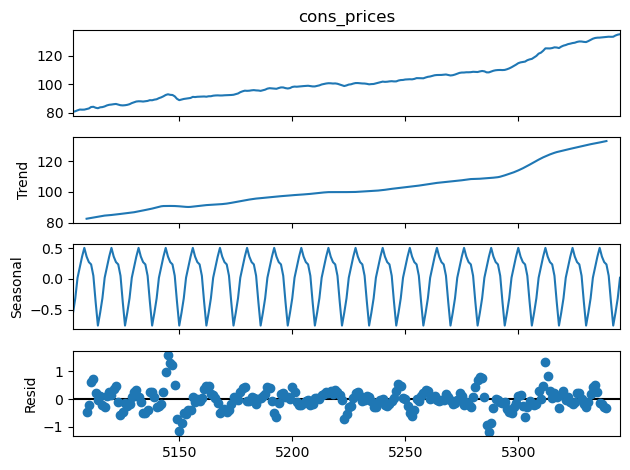

In [366]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(oecd_ctry_us['cons_prices'], model='additive', period=12)
res.plot(); plt.show()

##### Decompose unemployment rate time series data

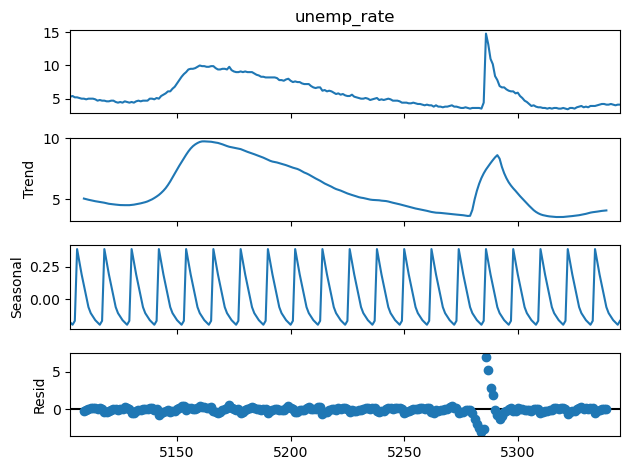

In [364]:
res = seasonal_decompose(oecd_ctry_us['unemp_rate'], model='additive', period=12)
res.plot(); plt.show()

##### Decompose 3-month interest rate time series data

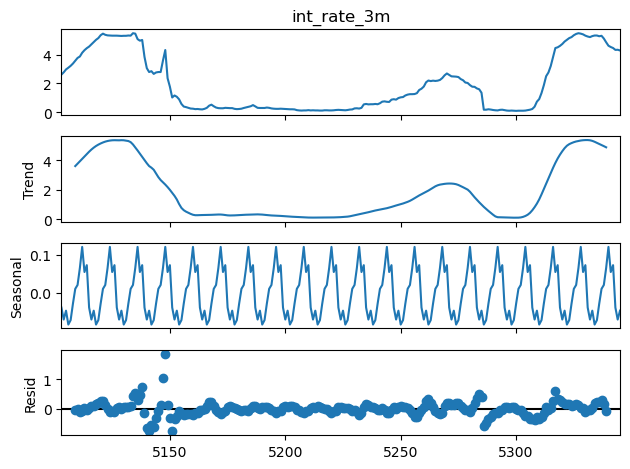

In [377]:
res = seasonal_decompose(oecd_ctry_us['int_rate_3m'], model='additive', period=12)
res.plot(); plt.show()

In [407]:
# Check variables for deletion candidates

oecd_ctry_us.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'cpi_rate', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'unemp_rate', 'population'],
      dtype='object')

In [409]:
# Create explicit copy before deletions to avoid the warning message "A value is trying to be set on a copy of a slice from a DataFrame"
# The 'deep=True' argument ensures that a completely independent of the DataFrame, including its data and index, is created

oecd_ctry_us_copy = oecd_ctry_us.copy(deep=True)

In [411]:
# Delete the 'fx_to_usd' and 'cpi_rate' (as a redundant measure of 'cons_prices') variables from the subset dataframe copy
# These are not needed for the analysis going forward

oecd_ctry_us_copy.drop(['fx_to_usd', 'cpi_rate'], axis=1, inplace=True)

In [413]:
# Check the dimensions

oecd_ctry_us_copy.shape

(243, 20)

In [415]:
# Check the first 3 rows

oecd_ctry_us_copy.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
5103,United States,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,False,2.28,2.61,4.22,66.10,80.46,44034.0,3.5,5.3,295516599.0
5104,United States,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,False,2.50,2.77,4.17,67.85,80.92,44034.0,3.5,5.4,295516599.0
5105,United States,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,False,2.63,2.97,4.50,68.08,81.56,44034.0,3.5,5.2,295516599.0


##### Define a custom function to transform specified variables with specified methods and append these to dataframe

In [419]:
def transform_series(series, method='log_return', allow_negatives=False, periods=12):
    if method == 'log_return':
        if (series <= 0).any() and not allow_negatives:
            return pd.Series([np.nan] * len(series), index=series.index)
        return np.log(series / series.shift(periods))

    elif method == 'pct_change':
        return series.pct_change(periods=periods)

    elif method == 'diff':
        return series.diff(periods=periods)

    elif method == 'log_level':
        if (series <= 0).any():
            return pd.Series([np.nan] * len(series), index=series.index)
        return np.log(series)

    elif method == 'log_return_pct_chg':
        # Convert percent change to log return: ln((x / 100) + 1)
        adjusted = (series / 100) + 1
        adjusted = adjusted.where(adjusted > 0, np.nan)  # Only mask invalid cases (≤ 0)
        return np.log(adjusted)

    else:
        raise ValueError(f"Unknown method: {method}")

#### Call the custom function to transform each variable one-by-one, specifying the transformation method to apply
#### Methods are log returns, first differences of % values and % changes, for an annualized (12-period) timescale

In [423]:
oecd_ctry_us_copy['int_rate_ovn_diff'] = transform_series(oecd_ctry_us_copy['int_rate_ovn'], method='diff')

In [429]:
oecd_ctry_us_copy['int_rate_3m_diff'] = transform_series(oecd_ctry_us_copy['int_rate_3m'], method='diff')

In [431]:
oecd_ctry_us_copy['int_rate_10y_diff'] = transform_series(oecd_ctry_us_copy['int_rate_10y'], method='diff')

In [437]:
oecd_ctry_us_copy['stock_index_logret12'] = transform_series(oecd_ctry_us_copy['stock_index'], method='log_return')

In [441]:
oecd_ctry_us_copy['cons_prices_logret12'] = transform_series(oecd_ctry_us_copy['cons_prices'], method='log_return')
oecd_ctry_us_copy['gdp_pc_usd_logret12'] = transform_series(oecd_ctry_us_copy['gdp_pc_usd'], method='log_return')

In [445]:
oecd_ctry_us_copy['real_gdp_chg_pct_logret12'] = transform_series(oecd_ctry_us_copy['real_gdp_chg_pct'], method='log_return_pct_chg')

In [449]:
oecd_ctry_us_copy['unemp_rate_logret12'] = transform_series(oecd_ctry_us_copy['unemp_rate'], method='log_return')

In [453]:
oecd_ctry_us_copy['population_pct_chg'] = transform_series(oecd_ctry_us_copy['population'], method='pct_change')

In [458]:
# Check the dimensions

oecd_ctry_us_copy.shape

(243, 29)

In [460]:
# Check the last 3 rows

oecd_ctry_us_copy.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
5343,United States,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,347300000.0,-1.0,-0.93,0.57,0.151096,0.029607,0.037657,0.01784,0.077962,0.02117
5344,United States,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,347300000.0,-1.0,-0.88,0.24,0.144901,0.027793,0.037657,0.01784,0.050010,0.02117
5345,United States,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,347300000.0,-1.0,-1.00,0.07,0.077757,0.023622,0.037657,0.01784,0.050010,0.02117


In [466]:
# Check the first 3 rows

oecd_ctry_us_copy.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
5103,United States,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,...,295516599.0,NaN,NaN,NaN,NaN,NaN,NaN,0.034401,NaN,NaN
5104,United States,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,...,295516599.0,NaN,NaN,NaN,NaN,NaN,NaN,0.034401,NaN,NaN
5105,United States,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,...,295516599.0,NaN,NaN,NaN,NaN,NaN,NaN,0.034401,NaN,NaN


#### Define a custom function to convert relevant variables from a % format to decimals, with option to overwrite existing variables or append
#### This is necessary to ensure all variables that undergo stationarity checks as the next step, are in a consistent decimal (not %) format

In [471]:
def convert_percent_to_decimal(df, columns, threshold=1.0, overwrite=False):
    """
    Converts an entire column from percent to decimal if any value exceeds threshold.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the columns.
        columns (str or list): Column name(s) to convert.
        threshold (float): Threshold used to detect if column is in percent format.
        overwrite (bool): If True, modifies the original column. Else, appends '_dec'.

    Returns:
        None (modifies df in-place)
    """
    if isinstance(columns, str):
        columns = [columns]

    for col in columns:
        if col not in df.columns:
            print(f"Warning: '{col}' not found in DataFrame. Skipping.")
            continue

        # If any value in the column has abs() > threshold, convert the whole column
        if (df[col].abs() > threshold).any():
            if overwrite:
                df[col] = df[col] / 100
            else:
                new_col = f"{col}_dec"
                df[new_col] = df[col] / 100
        else:
            print(f"'{col}' appears already in decimal form. No conversion applied.")

In [479]:
# Call the custom function to convert the transformed interest rate variables, which are in % format, to decimals
# Overwrite the relevant existing variables

columns_to_dec = ['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff']
convert_percent_to_decimal(oecd_ctry_us_copy, columns_to_dec, overwrite=True)

'int_rate_ovn_diff' appears already in decimal form. No conversion applied.
'int_rate_3m_diff' appears already in decimal form. No conversion applied.
'int_rate_10y_diff' appears already in decimal form. No conversion applied.


In [487]:
# Check the dimensions

oecd_ctry_us_copy.shape

(243, 29)

In [485]:
# Check the last 3 rows

oecd_ctry_us_copy.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
5343,United States,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,347300000.0,-0.01,-0.0093,0.0057,0.151096,0.029607,0.037657,0.01784,0.077962,0.02117
5344,United States,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,347300000.0,-0.01,-0.0088,0.0024,0.144901,0.027793,0.037657,0.01784,0.050010,0.02117
5345,United States,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,347300000.0,-0.01,-0.0100,0.0007,0.077757,0.023622,0.037657,0.01784,0.050010,0.02117


In [489]:
oecd_ctry_us_copy.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'int_rate_ovn', 'int_rate_3m', 'int_rate_10y',
       'stock_index', 'cons_prices', 'gdp_pc_usd', 'real_gdp_chg_pct',
       'unemp_rate', 'population', 'int_rate_ovn_diff', 'int_rate_3m_diff',
       'int_rate_10y_diff', 'stock_index_logret12', 'cons_prices_logret12',
       'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12',
       'unemp_rate_logret12', 'population_pct_chg'],
      dtype='object')

#### Export the first-step transformed subset dataframe for the US in a pickle format
#### This is for backup, before decomposing variables for stationarity checks and subsequent stationarization

In [494]:
path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'

oecd_ctry_us_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'us_pre_stat.pkl'))

#### Germany

In [498]:
# Create a subset dataframe filtered for the country 'Germany', include all original other variables in oecd_ctry

oecd_ctry_germany = oecd_ctry.loc[oecd_ctry['country'] == 'Germany', :]

In [500]:
# Check the dimensions
oecd_ctry_germany.shape

(243, 22)

In [502]:
# Check the first 3 rows
oecd_ctry_germany.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,cpi_rate,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
1944,Germany,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,...,2.08,2.15,3.56,51.83,85.27,1.44,35593.0,0.9,10.7,82469421.0
1945,Germany,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,...,2.06,2.14,3.54,53.04,85.64,1.66,35593.0,0.9,10.9,82469421.0
1946,Germany,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,...,2.06,2.14,3.70,53.24,86.02,1.77,35593.0,0.9,10.9,82469421.0


In [504]:
# Check the last 3 rows
oecd_ctry_germany.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,cpi_rate,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
2184,Germany,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,2.92,2.70,2.48,136.81,126.83,2.30,55911.0,0.0,3.5,84075075.0
2185,Germany,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,2.73,2.52,2.41,146.57,127.36,2.29,55911.0,0.0,3.5,84075075.0
2186,Germany,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,2.54,2.44,2.74,150.66,127.78,2.19,55911.0,0.0,3.5,84075075.0


#### Descriptive statistics

In [506]:
# Output descriptive statistics on all numerical variables in the oecd_ctry_germany subset dataframe
# Comment: Adding the .map('{:.2f]'.format) changes the numbers to non-scientific notation, 2 decimals format
# Comment (cont.): ... it applies the format only to the output specifically, not to the global display settings

oecd_ctry_germany.describe(include=np.number).map('{:.2f}'.format).T

,count,mean,std,min,25%,50%,75%,max
year,243.00,2014.63,5.86,2005.00,2010.00,2015.00,2020.00,2025.00
month,243.00,6.44,3.47,1.00,3.00,6.00,9.00,12.00
fx_to_usd,243.00,0.82,0.09,0.63,0.76,0.83,0.90,1.02
int_rate_ovn,243.00,0.98,1.61,-0.58,-0.36,0.25,2.30,4.30
int_rate_3m,243.00,1.20,1.71,-0.58,-0.31,0.50,2.49,5.11
int_rate_10y,243.00,1.72,1.52,-0.65,0.30,1.76,3.12,4.56
stock_index,243.00,89.60,23.09,42.07,70.09,90.32,109.09,150.66
cons_prices,243.00,101.43,10.96,85.27,92.88,99.72,105.62,127.78
cpi_rate,243.00,2.00,1.80,-1.04,1.12,1.65,2.18,8.82
gdp_pc_usd,243.00,46277.91,4848.64,35593.00,43189.00,47220.00,48983.00,55911.00


#### Decomposition of time series data for a few variables to confirm trend behavior, seasonality, residuals profile

##### Decompose consumer price index time series data for the oecd_ctry_germany subset dataframe

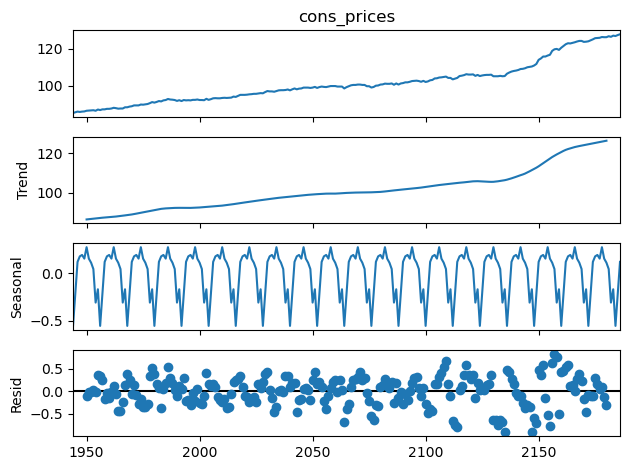

In [519]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(oecd_ctry_germany['cons_prices'], model='additive', period=12)
res.plot(); plt.show()

##### Decompose unemployment rate time series data

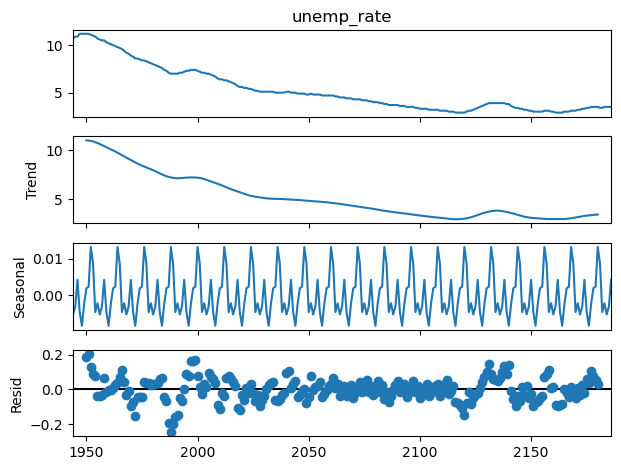

In [523]:
res = seasonal_decompose(oecd_ctry_germany['unemp_rate'], model='additive', period=12)
res.plot(); plt.show()

##### Decompose 3-month interest rate time series data

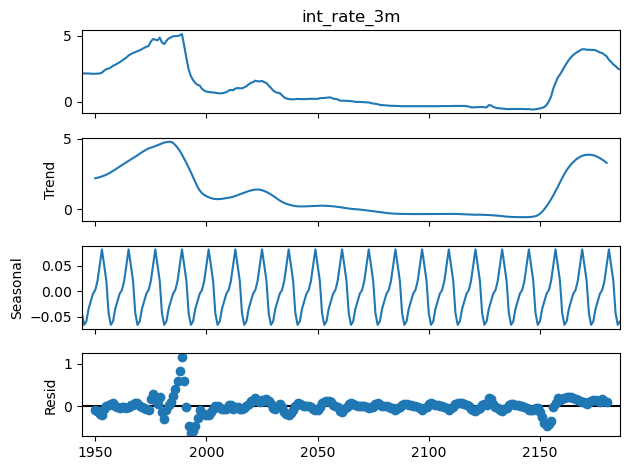

In [534]:
res = seasonal_decompose(oecd_ctry_germany['int_rate_3m'], model='additive', period=12)
res.plot(); plt.show()

In [536]:
# Check variables for deletion candidates

oecd_ctry_germany.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'cpi_rate', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'unemp_rate', 'population'],
      dtype='object')

In [546]:
# Create explicit copy before deletions to avoid the warning message "A value is trying to be set on a copy of a slice from a DataFrame"
# The 'deep=True' argument ensures that a completely independent of the DataFrame, including its data and index, is created
oecd_ctry_germany_copy = oecd_ctry_germany.copy(deep=True)

In [548]:
# Delete the 'cpi_rate' (as a redundant measure of 'cons_prices') variable from the subset dataframe copy
# This variable is not needed for the analysis going forward
oecd_ctry_germany_copy.drop(['cpi_rate'], axis=1, inplace=True)

In [550]:
# Check the dimensions
oecd_ctry_germany_copy.shape

(243, 21)

In [552]:
# Check the first 3 rows
oecd_ctry_germany_copy.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
1944,Germany,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,...,0.76,2.08,2.15,3.56,51.83,85.27,35593.0,0.9,10.7,82469421.0
1945,Germany,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,...,0.77,2.06,2.14,3.54,53.04,85.64,35593.0,0.9,10.9,82469421.0
1946,Germany,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,...,0.76,2.06,2.14,3.70,53.24,86.02,35593.0,0.9,10.9,82469421.0


#### Call the custom function defined earlier to transform each variable one-by-one, specifying the transformation method to apply
#### Methods are log returns, first differences of % values and % changes, for an annualized (12-period) timescale

In [558]:
oecd_ctry_germany_copy['fx_to_usd_logret12'] = transform_series(oecd_ctry_germany_copy['fx_to_usd'], method='log_return')
oecd_ctry_germany_copy['int_rate_ovn_diff'] = transform_series(oecd_ctry_germany_copy['int_rate_ovn'], method='diff')
oecd_ctry_germany_copy['int_rate_3m_diff'] = transform_series(oecd_ctry_germany_copy['int_rate_3m'], method='diff')
oecd_ctry_germany_copy['int_rate_10y_diff'] = transform_series(oecd_ctry_germany_copy['int_rate_10y'], method='diff')
oecd_ctry_germany_copy['stock_index_logret12'] = transform_series(oecd_ctry_germany_copy['stock_index'], method='log_return')
oecd_ctry_germany_copy['cons_prices_logret12'] = transform_series(oecd_ctry_germany_copy['cons_prices'], method='log_return')
oecd_ctry_germany_copy['gdp_pc_usd_logret12'] = transform_series(oecd_ctry_germany_copy['gdp_pc_usd'], method='log_return')
oecd_ctry_germany_copy['real_gdp_chg_pct_logret12'] = transform_series(oecd_ctry_germany_copy['real_gdp_chg_pct'], method='log_return_pct_chg')
oecd_ctry_germany_copy['unemp_rate_logret12'] = transform_series(oecd_ctry_germany_copy['unemp_rate'], method='log_return')
oecd_ctry_germany_copy['population_pct_chg'] = transform_series(oecd_ctry_germany_copy['population'], method='pct_change')

In [560]:
# Check the dimensions
oecd_ctry_germany_copy.shape

(243, 31)

In [562]:
# Check the last 3 rows
oecd_ctry_germany_copy.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
2184,Germany,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,0.052922,-0.98,-1.23,0.31,0.167592,0.022727,0.01661,0.0,0.089612,-0.005643
2185,Germany,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,0.031749,-1.18,-1.40,0.08,0.214026,0.022632,0.01661,0.0,0.058841,-0.005643
2186,Germany,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,0.000000,-1.37,-1.48,0.39,0.199351,0.021676,0.01661,0.0,0.058841,-0.005643


In [564]:
# Check the first 3 rows
oecd_ctry_germany_copy.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
1944,Germany,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00896,NaN,NaN
1945,Germany,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00896,NaN,NaN
1946,Germany,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00896,NaN,NaN


##### Convert those variables that are in a % format to a decimal format

In [567]:
# Call the custom function defined earlier to convert the transformed interest rate variables, which are in % format, to decimals
# Overwrite the relevant existing variables

columns_to_dec = ['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff']
convert_percent_to_decimal(oecd_ctry_germany_copy, columns_to_dec, overwrite=True)

In [569]:
# Check the dimensions
oecd_ctry_germany_copy.shape

(243, 31)

In [571]:
# Check the last 3 rows
oecd_ctry_germany_copy.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
2184,Germany,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,0.052922,-0.0098,-0.0123,0.0031,0.167592,0.022727,0.01661,0.0,0.089612,-0.005643
2185,Germany,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,0.031749,-0.0118,-0.0140,0.0008,0.214026,0.022632,0.01661,0.0,0.058841,-0.005643
2186,Germany,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,0.000000,-0.0137,-0.0148,0.0039,0.199351,0.021676,0.01661,0.0,0.058841,-0.005643


In [573]:
oecd_ctry_germany_copy.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'unemp_rate', 'population', 'fx_to_usd_logret12',
       'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg'],
      dtype='object')

#### Export the first-step transformed subset dataframe for Germany in a pickle format
#### This is for backup, before decomposing variables for stationarity checks and subsequent stationarization

In [577]:
oecd_ctry_germany_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'germany_pre_stat.pkl'))

#### Japan

In [580]:
# Create a subset dataframe filtered for the country 'Japan', include all original other variables in oecd_ctry
oecd_ctry_japan = oecd_ctry.loc[oecd_ctry['country'] == 'Japan', :]

In [582]:
# Check the dimensions
oecd_ctry_japan.shape

(243, 22)

In [584]:
# Check the first 3 rows
oecd_ctry_japan.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,cpi_rate,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
2673,Japan,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,...,0.0,0.10,1.31,73.77,97.02,-0.1,37819.0,1.8,4.5,127767994.0
2674,Japan,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,...,0.0,0.10,1.42,74.76,96.72,-0.3,37819.0,1.8,4.6,127767994.0
2675,Japan,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,...,0.0,0.08,1.32,76.86,97.02,-0.2,37819.0,1.8,4.5,127767994.0


In [586]:
# Check the last 3 rows
oecd_ctry_japan.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,cpi_rate,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
2913,Japan,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,0.29,0.77,1.25,176.85,NaN,NaN,33956.0,0.6,2.5,123103479.0
2914,Japan,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,0.48,0.79,1.37,176.61,NaN,NaN,33956.0,0.6,2.4,123103479.0
2915,Japan,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,0.48,0.79,1.48,176.99,NaN,NaN,33956.0,0.6,2.4,123103479.0


#### Descriptive statistics

In [589]:
# Output descriptive statistics on all numerical variables in the oecd_ctry_japan subset dataframe
# Comment: Adding the .map('{:.2f]'.format) changes the numbers to non-scientific notation, 2 decimals format
# Comment (cont.): ... it applies the format only to the output specifically, not to the global display settings

oecd_ctry_japan.describe(include=np.number).map('{:.2f}'.format).T

,count,mean,std,min,25%,50%,75%,max
year,243.00,2014.63,5.86,2005.00,2010.00,2015.00,2020.00,2025.00
month,243.00,6.44,3.47,1.00,3.00,6.00,9.00,12.00
fx_to_usd,243.00,110.19,18.61,76.65,100.39,109.33,117.64,157.89
int_rate_ovn,243.00,0.08,0.16,-0.07,-0.04,0.07,0.09,0.52
int_rate_3m,243.00,0.23,0.26,-0.07,0.05,0.17,0.34,0.89
int_rate_10y,243.00,0.70,0.61,-0.28,0.08,0.66,1.26,1.96
stock_index,243.00,96.63,32.37,47.05,74.75,99.12,113.16,183.43
cons_prices,198.00,98.66,2.07,95.70,96.82,97.73,100.35,102.32
cpi_rate,198.00,0.27,1.05,-2.50,-0.30,0.20,0.70,3.70
gdp_pc_usd,243.00,39339.51,4379.13,32498.00,35847.00,39411.00,40548.00,49175.00


#### Decomposition of time series data for a few variables to confirm trend behavior, seasonality, residuals profile

#### Note: No decomposition of consumer price index data for Japan due to almost 4 years of NaNs at the tail end of the time series data

##### Decompose unemployment rate time series data

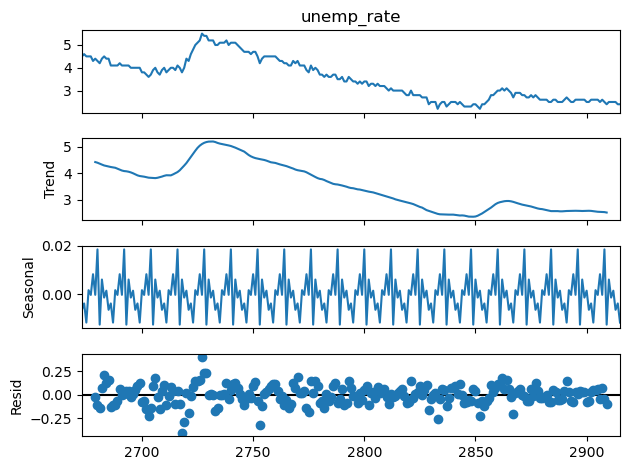

In [596]:
res = seasonal_decompose(oecd_ctry_japan['unemp_rate'], model='additive', period=12)
res.plot(); plt.show()

##### Decompose 3-month interest rate time series data

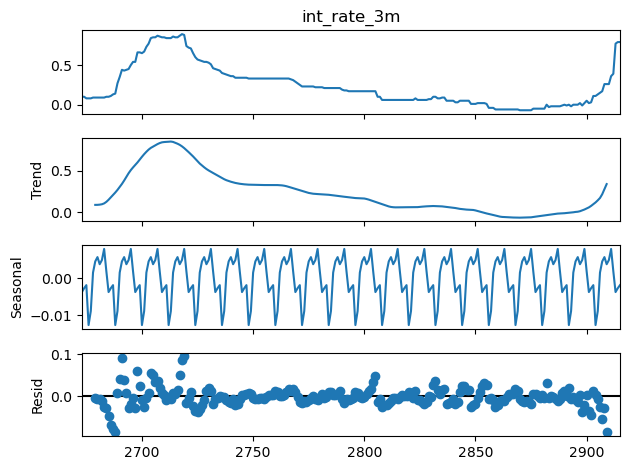

In [601]:
res = seasonal_decompose(oecd_ctry_japan['int_rate_3m'], model='additive', period=12)
res.plot(); plt.show()

In [603]:
# Check variables for deletion candidates
oecd_ctry_japan.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'cpi_rate', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'unemp_rate', 'population'],
      dtype='object')

In [605]:
# Create explicit copy before deletions to avoid the warning message "A value is trying to be set on a copy of a slice from a DataFrame"
# The 'deep=True' argument ensures that a completely independent of the DataFrame, including its data and index, is created
oecd_ctry_japan_copy = oecd_ctry_japan.copy(deep=True)

In [607]:
# Delete 'cons_prices' and 'cpi_rate' variables from the subset dataframe copy
# In the original raw dataset there was almost 4 years of missing data values for these variables, so they are removed for analysis
oecd_ctry_japan_copy.drop(['cons_prices', 'cpi_rate'], axis=1, inplace=True)

In [609]:
# Check the dimensions
oecd_ctry_japan_copy.shape

(243, 20)

In [612]:
# Check the first 3 rows
oecd_ctry_japan_copy.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,fx_to_usd,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
2673,Japan,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,False,103.36,0.0,0.10,1.31,73.77,37819.0,1.8,4.5,127767994.0
2674,Japan,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,False,104.99,0.0,0.10,1.42,74.76,37819.0,1.8,4.6,127767994.0
2675,Japan,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,False,105.28,0.0,0.08,1.32,76.86,37819.0,1.8,4.5,127767994.0


#### Call the custom function defined earlier to transform each variable one-by-one, specifying the transformation method to apply
#### Methods are log returns, first differences of % values and % changes, for an annualized (12-period) timescale

In [617]:
oecd_ctry_japan_copy['fx_to_usd_logret12'] = transform_series(oecd_ctry_japan_copy['fx_to_usd'], method='log_return')
oecd_ctry_japan_copy['int_rate_ovn_diff'] = transform_series(oecd_ctry_japan_copy['int_rate_ovn'], method='diff')
oecd_ctry_japan_copy['int_rate_3m_diff'] = transform_series(oecd_ctry_japan_copy['int_rate_3m'], method='diff')
oecd_ctry_japan_copy['int_rate_10y_diff'] = transform_series(oecd_ctry_japan_copy['int_rate_10y'], method='diff')
oecd_ctry_japan_copy['stock_index_logret12'] = transform_series(oecd_ctry_japan_copy['stock_index'], method='log_return')
oecd_ctry_japan_copy['gdp_pc_usd_logret12'] = transform_series(oecd_ctry_japan_copy['gdp_pc_usd'], method='log_return')
oecd_ctry_japan_copy['real_gdp_chg_pct_logret12'] = transform_series(oecd_ctry_japan_copy['real_gdp_chg_pct'], method='log_return_pct_chg')
oecd_ctry_japan_copy['unemp_rate_logret12'] = transform_series(oecd_ctry_japan_copy['unemp_rate'], method='log_return')
oecd_ctry_japan_copy['population_pct_chg'] = transform_series(oecd_ctry_japan_copy['population'], method='pct_change')

In [619]:
# Check the dimensions
oecd_ctry_japan_copy.shape

(243, 29)

In [621]:
# Check the last 3 rows
oecd_ctry_japan_copy.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
2913,Japan,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,123103479.0,0.071828,0.30,0.75,0.52,0.10376,0.043887,0.005982,0.000000,-0.005249
2914,Japan,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,123103479.0,0.016723,0.49,0.76,0.66,0.04992,0.043887,0.005982,-0.080043,-0.005249
2915,Japan,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,123103479.0,-0.003815,0.46,0.68,0.76,0.00578,0.043887,0.005982,-0.080043,-0.005249


In [623]:
# Check the first 3 rows
oecd_ctry_japan_copy.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
2673,Japan,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,...,127767994.0,NaN,NaN,NaN,NaN,NaN,NaN,0.01784,NaN,NaN
2674,Japan,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,...,127767994.0,NaN,NaN,NaN,NaN,NaN,NaN,0.01784,NaN,NaN
2675,Japan,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,...,127767994.0,NaN,NaN,NaN,NaN,NaN,NaN,0.01784,NaN,NaN


##### Convert those variables that are in a % format to a decimal format

In [628]:
# Call the custom function defined earlier to convert the transformed interest rate variables, which are in % format, to decimals
# Overwrite the relevant existing variables

columns_to_dec = ['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff']
convert_percent_to_decimal(oecd_ctry_japan_copy, columns_to_dec, threshold=0.5, overwrite=True)

In [630]:
# Check the dimensions
oecd_ctry_japan_copy.shape

(243, 29)

In [632]:
# Check the last 3 rows
oecd_ctry_japan_copy.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
2913,Japan,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,123103479.0,0.071828,0.0030,0.0075,0.0052,0.10376,0.043887,0.005982,0.000000,-0.005249
2914,Japan,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,123103479.0,0.016723,0.0049,0.0076,0.0066,0.04992,0.043887,0.005982,-0.080043,-0.005249
2915,Japan,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,123103479.0,-0.003815,0.0046,0.0068,0.0076,0.00578,0.043887,0.005982,-0.080043,-0.005249


In [634]:
oecd_ctry_japan_copy.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'gdp_pc_usd', 'real_gdp_chg_pct',
       'unemp_rate', 'population', 'fx_to_usd_logret12', 'int_rate_ovn_diff',
       'int_rate_3m_diff', 'int_rate_10y_diff', 'stock_index_logret12',
       'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12',
       'unemp_rate_logret12', 'population_pct_chg'],
      dtype='object')

#### Export the first-step transformed subset dataframe for Japan in a pickle format
#### This is for backup, before decomposing variables for stationarity checks and subsequent stationarization

In [639]:
oecd_ctry_japan_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'japan_pre_stat.pkl'))

#### South Korea

In [642]:
# Create a subset dataframe filtered for the country 'South Korea', include all original other variables in oecd_ctry
oecd_ctry_south_korea = oecd_ctry.loc[oecd_ctry['country'] == 'South Korea', :]

In [644]:
# Check the dimensions
oecd_ctry_south_korea.shape

(243, 22)

In [646]:
# Check the first 3 rows
oecd_ctry_south_korea.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,cpi_rate,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
3888,South Korea,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,...,3.26,3.47,4.42,44.92,77.58,3.40,20163.0,4.4,3.8,48184561.0
3889,South Korea,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,...,3.26,3.59,4.88,47.84,77.90,3.36,20163.0,4.4,3.6,48184561.0
3890,South Korea,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,...,3.25,3.55,4.77,49.19,78.37,2.99,20163.0,4.4,3.6,48184561.0


In [648]:
# Check the last 3 rows
oecd_ctry_south_korea.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,cpi_rate,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
4128,South Korea,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,3.05,3.04,2.82,124.56,121.98,2.24,34642.0,1.0,2.9,51667029.0
4129,South Korea,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,2.96,2.95,2.83,128.22,122.37,2.02,34642.0,1.0,2.7,51667029.0
4130,South Korea,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,2.75,2.84,2.80,128.45,122.59,2.05,34642.0,1.0,2.7,51667029.0


#### Descriptive statistics

In [650]:
# Output descriptive statistics on all numerical variables in the oecd_ctry_south_korea subset dataframe
# Comment: Adding the .map('{:.2f]'.format) changes the numbers to non-scientific notation, 2 decimals format
# Comment (cont.): ... it applies the format only to the output specifically, not to the global display settings

oecd_ctry_south_korea.describe(include=np.number).map('{:.2f}'.format).T

,count,mean,std,min,25%,50%,75%,max
year,243.00,2014.63,5.86,2005.00,2010.00,2015.00,2020.00,2025.00
month,243.00,6.44,3.47,1.00,3.00,6.00,9.00,12.00
fx_to_usd,243.00,1143.56,122.84,915.30,1071.30,1131.49,1195.99,1457.60
int_rate_ovn,243.00,2.50,1.24,0.48,1.49,2.48,3.27,5.21
int_rate_3m,243.00,2.78,1.31,0.63,1.65,2.66,3.58,6.03
int_rate_10y,243.00,3.46,1.33,1.25,2.29,3.35,4.78,6.03
stock_index,243.00,100.89,24.36,44.92,88.56,99.57,117.84,162.05
cons_prices,243.00,98.97,11.77,77.58,90.06,99.72,105.41,122.59
cpi_rate,243.00,2.31,1.38,-0.43,1.23,2.16,3.15,6.33
gdp_pc_usd,243.00,29424.91,5527.27,19933.00,25075.00,30667.00,34642.00,37518.00


#### Decomposition of time series data for a few variables to confirm trend behavior, seasonality, residuals profile

##### Decompose consumer price index time series data for the oecd_ctry_south_korea subset dataframe

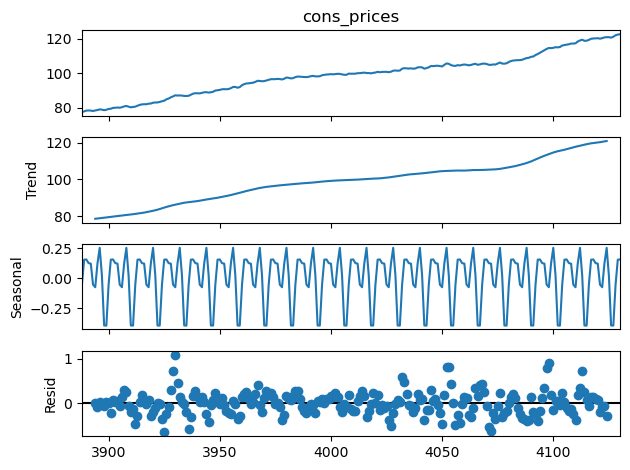

In [658]:
res = seasonal_decompose(oecd_ctry_south_korea['cons_prices'], model='additive', period=12)
res.plot(); plt.show()

##### Decompose unemployment rate time series data

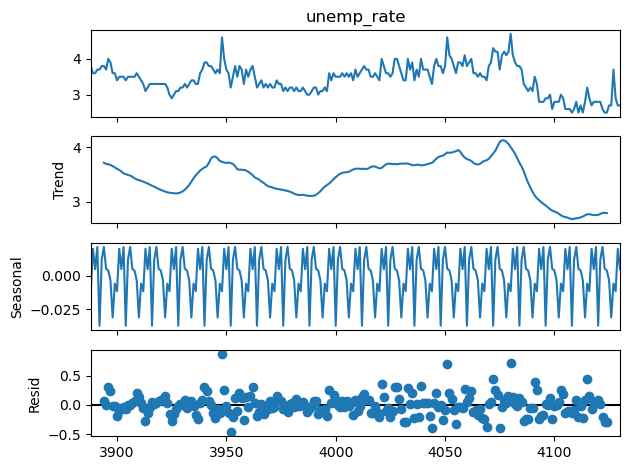

In [660]:
res = seasonal_decompose(oecd_ctry_south_korea['unemp_rate'], model='additive', period=12)
res.plot(); plt.show()

##### Decompose 3-month interest rate time series data

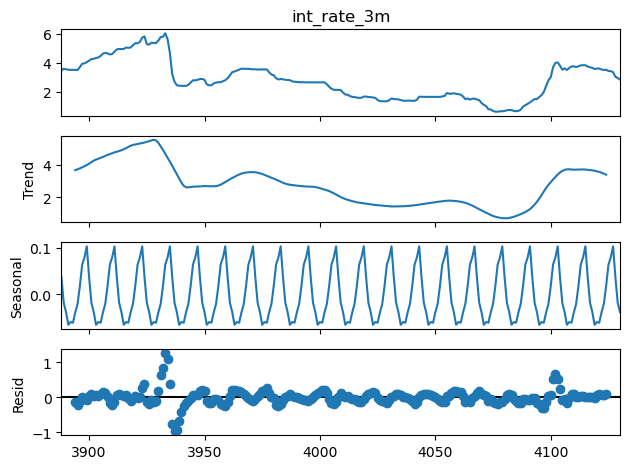

In [663]:
res = seasonal_decompose(oecd_ctry_south_korea['int_rate_3m'], model='additive', period=12)
res.plot(); plt.show()

In [665]:
# Check variables for deletion candidates
oecd_ctry_south_korea.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'cpi_rate', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'unemp_rate', 'population'],
      dtype='object')

In [667]:
# Create explicit copy before deletions to avoid the warning message "A value is trying to be set on a copy of a slice from a DataFrame"
# The 'deep=True' argument ensures that a completely independent of the DataFrame, including its data and index, is created
oecd_ctry_south_korea_copy = oecd_ctry_south_korea.copy(deep=True)

In [669]:
# Delete the 'cpi_rate' (as a redundant measure of 'cons_prices') variable from the subset dataframe copy
# This variable is not needed for the analysis going forward
oecd_ctry_south_korea_copy.drop(['cpi_rate'], axis=1, inplace=True)

In [675]:
# Check the dimensions
oecd_ctry_south_korea_copy.shape

(243, 21)

In [677]:
# Check the first 3 rows
oecd_ctry_south_korea_copy.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
3888,South Korea,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,...,1038.59,3.26,3.47,4.42,44.92,77.58,20163.0,4.4,3.8,48184561.0
3889,South Korea,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,...,1021.17,3.26,3.59,4.88,47.84,77.90,20163.0,4.4,3.6,48184561.0
3890,South Korea,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,...,1008.11,3.25,3.55,4.77,49.19,78.37,20163.0,4.4,3.6,48184561.0


#### Call the custom function defined earlier to transform each variable one-by-one, specifying the transformation method to apply
#### Methods are log returns, first differences of % values and % changes, for an annualized (12-period) timescale

In [681]:
oecd_ctry_south_korea_copy['fx_to_usd_logret12'] = transform_series(oecd_ctry_south_korea_copy['fx_to_usd'], method='log_return')
oecd_ctry_south_korea_copy['int_rate_ovn_diff'] = transform_series(oecd_ctry_south_korea_copy['int_rate_ovn'], method='diff')
oecd_ctry_south_korea_copy['int_rate_3m_diff'] = transform_series(oecd_ctry_south_korea_copy['int_rate_3m'], method='diff')
oecd_ctry_south_korea_copy['int_rate_10y_diff'] = transform_series(oecd_ctry_south_korea_copy['int_rate_10y'], method='diff')
oecd_ctry_south_korea_copy['stock_index_logret12'] = transform_series(oecd_ctry_south_korea_copy['stock_index'], method='log_return')
oecd_ctry_south_korea_copy['cons_prices_logret12'] = transform_series(oecd_ctry_south_korea_copy['cons_prices'], method='log_return')
oecd_ctry_south_korea_copy['gdp_pc_usd_logret12'] = transform_series(oecd_ctry_south_korea_copy['gdp_pc_usd'], method='log_return')
oecd_ctry_south_korea_copy['real_gdp_chg_pct_logret12'] = transform_series(oecd_ctry_south_korea_copy['real_gdp_chg_pct'], method='log_return_pct_chg')
oecd_ctry_south_korea_copy['unemp_rate_logret12'] = transform_series(oecd_ctry_south_korea_copy['unemp_rate'], method='log_return')
oecd_ctry_south_korea_copy['population_pct_chg'] = transform_series(oecd_ctry_south_korea_copy['population'], method='pct_change')

In [683]:
# Check the dimensions
oecd_ctry_south_korea_copy.shape

(243, 31)

In [685]:
# Check the last 3 rows
oecd_ctry_south_korea_copy.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
4128,South Korea,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,0.090444,-0.42,-0.70,-0.53,-0.007678,0.022216,-0.042029,0.00995,0.000000,-0.000978
4129,South Korea,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,0.082512,-0.62,-0.74,-0.60,-0.019463,0.020058,-0.042029,0.00995,0.000000,-0.000978
4130,South Korea,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,0.090493,-0.72,-0.81,-0.59,-0.042971,0.020354,-0.042029,0.00995,-0.036368,-0.000978


In [687]:
# Check the first 3 rows
oecd_ctry_south_korea_copy.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
3888,South Korea,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN
3889,South Korea,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN
3890,South Korea,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN


##### Convert those variables that are in a % format to a decimal format

In [690]:
# Call the custom function defined earlier to convert the transformed interest rate variables, which are in % format, to decimals
# Overwrite the relevant existing variables

columns_to_dec = ['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff']
convert_percent_to_decimal(oecd_ctry_south_korea_copy, columns_to_dec, overwrite=True)

In [692]:
# Check the dimensions
oecd_ctry_south_korea_copy.shape

(243, 31)

In [694]:
# Check the last 3 rows
oecd_ctry_south_korea_copy.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
4128,South Korea,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,0.090444,-0.0042,-0.0070,-0.0053,-0.007678,0.022216,-0.042029,0.00995,0.000000,-0.000978
4129,South Korea,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,0.082512,-0.0062,-0.0074,-0.0060,-0.019463,0.020058,-0.042029,0.00995,0.000000,-0.000978
4130,South Korea,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,0.090493,-0.0072,-0.0081,-0.0059,-0.042971,0.020354,-0.042029,0.00995,-0.036368,-0.000978


In [696]:
oecd_ctry_south_korea_copy.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'unemp_rate', 'population', 'fx_to_usd_logret12',
       'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg'],
      dtype='object')

#### Export the first-step transformed subset dataframe for South Korea in a pickle format
#### This is for backup, before decomposing variables for stationarity checks and subsequent stationarization

In [700]:
oecd_ctry_south_korea_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'south_korea_pre_stat.pkl'))

#### Australia

In [703]:
# Create a subset dataframe filtered for the country 'Australia', include all original other variables in oecd_ctry
oecd_ctry_australia = oecd_ctry.loc[oecd_ctry['country'] == 'Australia', :]

In [705]:
# Check the dimensions
oecd_ctry_australia.shape

(243, 22)

In [707]:
# Check the first 3 rows
oecd_ctry_australia.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,cpi_rate,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
0,Australia,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,...,5.25,5.42,5.35,73.98,NaN,2.37,36260.0,3.0,5.07,20176844.0
1,Australia,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,...,5.25,5.63,5.40,75.64,NaN,2.37,36260.0,3.0,5.08,20176844.0
2,Australia,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,...,5.49,5.81,5.65,76.40,NaN,2.37,36260.0,3.0,5.16,20176844.0


In [709]:
# Check the last 3 rows
oecd_ctry_australia.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,cpi_rate,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
240,Australia,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,4.35,4.33,4.48,151.71,NaN,2.42,64547.0,1.6,4.11,27670000.0
241,Australia,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,4.25,4.17,4.42,153.03,NaN,2.42,64547.0,1.6,4.05,27670000.0
242,Australia,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,4.10,4.12,4.42,144.68,NaN,2.42,64547.0,1.6,4.05,27670000.0


#### Descriptive statistics

In [712]:
# Output descriptive statistics on all numerical variables in the oecd_ctry_australia subset dataframe
# Comment: Adding the .map('{:.2f]'.format) changes the numbers to non-scientific notation, 2 decimals format
# Comment (cont.): ... it applies the format only to the output specifically, not to the global display settings

oecd_ctry_australia.describe(include=np.number).map('{:.2f}'.format).T

,count,mean,std,min,25%,50%,75%,max
year,243.00,2014.63,5.86,2005.00,2010.00,2015.00,2020.00,2025.00
month,243.00,6.44,3.47,1.00,3.00,6.00,9.00,12.00
fx_to_usd,243.00,1.28,0.18,0.93,1.12,1.31,1.40,1.61
int_rate_ovn,243.00,3.19,1.97,0.10,1.50,3.00,4.50,7.25
int_rate_3m,243.00,3.36,2.02,0.01,1.93,3.13,4.81,7.90
int_rate_10y,243.00,3.73,1.54,0.80,2.63,3.77,5.22,6.59
stock_index,243.00,103.53,20.80,61.71,87.91,100.64,119.11,153.03
cons_prices,0.00,nan,nan,nan,nan,nan,nan,nan
cpi_rate,243.00,2.74,1.49,-0.35,1.78,2.42,3.34,7.83
gdp_pc_usd,243.00,55967.94,9420.58,36260.00,51446.00,56357.00,64652.00,68481.00


#### Decomposition of time series data for a few variables to confirm trend behavior, seasonality, residuals profile

#### Note: No decomposition of consumer price index data for Australia as this was not available in index form

##### Decompose unemployment rate time series data

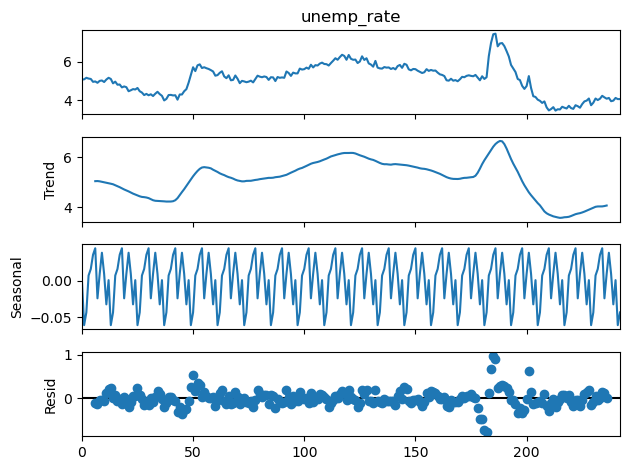

In [719]:
res = seasonal_decompose(oecd_ctry_australia['unemp_rate'], model='additive', period=12)
res.plot(); plt.show()

##### Decompose 3-month interest rate time series data

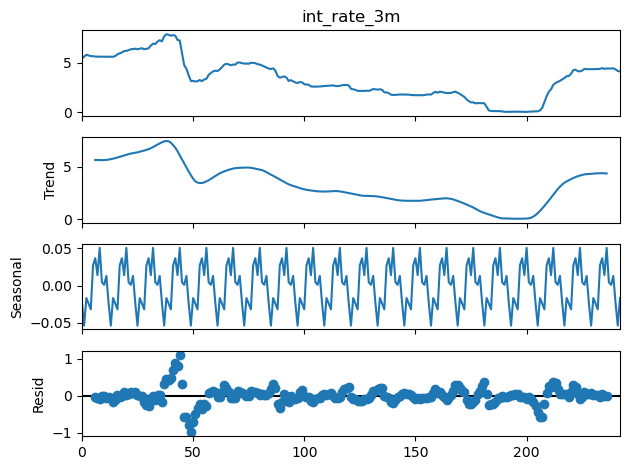

In [724]:
res = seasonal_decompose(oecd_ctry_australia['int_rate_3m'], model='additive', period=12)
res.plot(); plt.show()

In [726]:
# Check variables for deletion candidates
oecd_ctry_australia.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'cpi_rate', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'unemp_rate', 'population'],
      dtype='object')

In [728]:
# Create explicit copy before deletions to avoid the warning message "A value is trying to be set on a copy of a slice from a DataFrame"
# The 'deep=True' argument ensures that a completely independent of the DataFrame, including its data and index, is created
oecd_ctry_australia_copy = oecd_ctry_australia.copy(deep=True)

In [730]:
# Delete 'cons_prices' and 'cpi_rate' variables from the subset dataframe copy
# In the original raw dataset there was no data for 'cons_prices' and 'cpi_rate' was sparse (quarterly), so they are removed for analysis
oecd_ctry_australia_copy.drop(['cons_prices', 'cpi_rate'], axis=1, inplace=True)

In [734]:
# Check the dimensions
oecd_ctry_australia_copy.shape

(243, 20)

In [736]:
# Check the first 3 rows
oecd_ctry_australia_copy.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,fx_to_usd,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
0,Australia,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,False,1.31,5.25,5.42,5.35,73.98,36260.0,3.0,5.07,20176844.0
1,Australia,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,False,1.28,5.25,5.63,5.40,75.64,36260.0,3.0,5.08,20176844.0
2,Australia,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,False,1.27,5.49,5.81,5.65,76.40,36260.0,3.0,5.16,20176844.0


#### Call the custom function defined earlier to transform each variable one-by-one, specifying the transformation method to apply
#### Methods are log returns, first differences of % values and % changes, for an annualized (12-period) timescale

In [738]:
oecd_ctry_australia_copy['fx_to_usd_logret12'] = transform_series(oecd_ctry_australia_copy['fx_to_usd'], method='log_return')
oecd_ctry_australia_copy['int_rate_ovn_diff'] = transform_series(oecd_ctry_australia_copy['int_rate_ovn'], method='diff')
oecd_ctry_australia_copy['int_rate_3m_diff'] = transform_series(oecd_ctry_australia_copy['int_rate_3m'], method='diff')
oecd_ctry_australia_copy['int_rate_10y_diff'] = transform_series(oecd_ctry_australia_copy['int_rate_10y'], method='diff')
oecd_ctry_australia_copy['stock_index_logret12'] = transform_series(oecd_ctry_australia_copy['stock_index'], method='log_return')
oecd_ctry_australia_copy['gdp_pc_usd_logret12'] = transform_series(oecd_ctry_australia_copy['gdp_pc_usd'], method='log_return')
oecd_ctry_australia_copy['real_gdp_chg_pct_logret12'] = transform_series(oecd_ctry_australia_copy['real_gdp_chg_pct'], method='log_return_pct_chg')
oecd_ctry_australia_copy['unemp_rate_logret12'] = transform_series(oecd_ctry_australia_copy['unemp_rate'], method='log_return')
oecd_ctry_australia_copy['population_pct_chg'] = transform_series(oecd_ctry_australia_copy['population'], method='pct_change')

In [740]:
# Check the dimensions
oecd_ctry_australia_copy.shape

(243, 29)

In [742]:
# Check the last 3 rows
oecd_ctry_australia_copy.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
240,Australia,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,27670000.0,0.070769,0.00,-0.02,0.33,0.103963,-0.026012,0.015873,0.007326,0.013204
241,Australia,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,27670000.0,0.038466,-0.10,-0.17,0.28,0.096376,-0.026012,0.015873,0.082309,0.013204
242,Australia,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,27670000.0,0.045024,-0.25,-0.23,0.38,0.024064,-0.026012,0.015873,0.048050,0.013204


In [744]:
# Check the first 3 rows
oecd_ctry_australia_copy.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
0,Australia,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,...,20176844.0,NaN,NaN,NaN,NaN,NaN,NaN,0.029559,NaN,NaN
1,Australia,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,...,20176844.0,NaN,NaN,NaN,NaN,NaN,NaN,0.029559,NaN,NaN
2,Australia,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,...,20176844.0,NaN,NaN,NaN,NaN,NaN,NaN,0.029559,NaN,NaN


##### Convert those variables that are in a % format to decimal format

In [747]:
# Call the custom function defined earlier to convert the transformed interest rate variables, which are in % format, to decimals
# Overwrite the relevant existing variables

columns_to_dec = ['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff']
convert_percent_to_decimal(oecd_ctry_australia_copy, columns_to_dec, overwrite=True)

In [750]:
# Check the dimensions
oecd_ctry_australia_copy.shape

(243, 29)

In [752]:
# Check the last 3 rows
oecd_ctry_australia_copy.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
240,Australia,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,27670000.0,0.070769,0.0000,-0.0002,0.0033,0.103963,-0.026012,0.015873,0.007326,0.013204
241,Australia,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,27670000.0,0.038466,-0.0010,-0.0017,0.0028,0.096376,-0.026012,0.015873,0.082309,0.013204
242,Australia,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,27670000.0,0.045024,-0.0025,-0.0023,0.0038,0.024064,-0.026012,0.015873,0.048050,0.013204


In [754]:
oecd_ctry_australia_copy.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'gdp_pc_usd', 'real_gdp_chg_pct',
       'unemp_rate', 'population', 'fx_to_usd_logret12', 'int_rate_ovn_diff',
       'int_rate_3m_diff', 'int_rate_10y_diff', 'stock_index_logret12',
       'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12',
       'unemp_rate_logret12', 'population_pct_chg'],
      dtype='object')

#### Export the first-step transformed subset dataframe for Australia in a pickle format
#### This is for backup, before decomposing variables for stationarity checks and subsequent stationarization

In [757]:
oecd_ctry_australia_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'australia_pre_stat.pkl'))

#### Norway

In [760]:
# Create a subset dataframe filtered for the country 'Norway', include all original other variables in oecd_ctry
oecd_ctry_norway = oecd_ctry.loc[oecd_ctry['country'] == 'Norway', :]

In [763]:
# Check the dimensions
oecd_ctry_norway.shape

(243, 22)

In [765]:
# Check the first 3 rows
oecd_ctry_norway.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,cpi_rate,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
3402,Norway,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,...,2.02,1.96,3.90,37.94,81.2,1.00,66924.0,2.7,4.5,4623293.0
3403,Norway,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,...,2.01,1.92,3.77,40.49,81.3,0.99,66924.0,2.7,4.4,4623293.0
3404,Norway,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,...,2.06,2.02,4.02,41.87,81.7,0.99,66924.0,2.7,4.6,4623293.0


In [767]:
# Check the last 3 rows
oecd_ctry_norway.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,cpi_rate,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
3642,Norway,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,4.5,4.61,3.88,257.77,135.1,2.35,89694.0,2.1,3.7,5623071.0
3643,Norway,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,4.5,4.51,3.88,258.42,137.0,3.55,89694.0,2.1,3.8,5623071.0
3644,Norway,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,4.5,4.57,4.02,261.14,136.1,2.64,89694.0,2.1,3.8,5623071.0


#### Descriptive statistics

In [769]:
# Output descriptive statistics on all numerical variables in the oecd_ctry_norway subset dataframe
# Comment: Adding the .map('{:.2f]'.format) changes the numbers to non-scientific notation, 2 decimals format
# Comment (cont.): ... it applies the format only to the output specifically, not to the global display settings

oecd_ctry_norway.describe(include=np.number).map('{:.2f}'.format).T

,count,mean,std,min,25%,50%,75%,max
year,243.00,2014.63,5.86,2005.00,2010.00,2015.00,2020.00,2025.00
month,243.00,6.44,3.47,1.00,3.00,6.00,9.00,12.00
fx_to_usd,243.00,7.59,1.74,5.06,6.00,7.59,8.73,11.35
int_rate_ovn,243.00,2.07,1.61,-0.01,0.74,1.53,2.75,6.72
int_rate_3m,243.00,2.43,1.58,0.20,1.19,1.96,3.20,6.92
int_rate_10y,243.00,2.76,1.18,0.47,1.69,2.84,3.77,5.19
stock_index,243.00,116.58,59.17,37.94,71.19,97.48,151.45,261.14
cons_prices,243.00,102.65,15.06,81.20,91.15,98.90,111.50,137.00
cpi_rate,243.00,2.55,1.49,-0.35,1.62,2.24,3.22,7.51
gdp_pc_usd,243.00,85981.51,12243.34,66924.00,75940.00,86611.00,97120.00,108908.00


#### Decomposition of time series data for a few variables to confirm trend behavior, seasonality, residuals profile

##### Decompose consumer price index time series data for the oecd_ctry_norway subset dataframe

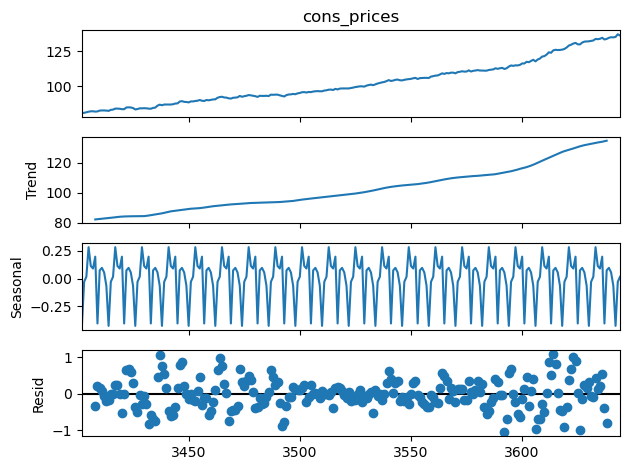

In [779]:
res = seasonal_decompose(oecd_ctry_norway['cons_prices'], model='additive', period=12)
res.plot(); plt.show()

##### Decompose unemployment rate time series data

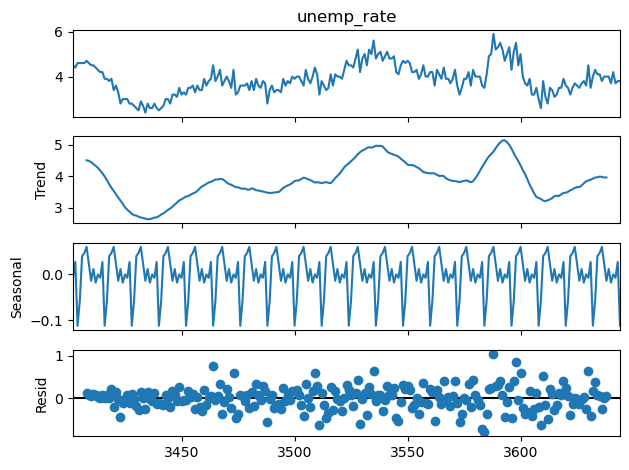

In [782]:
res = seasonal_decompose(oecd_ctry_norway['unemp_rate'], model='additive', period=12)
res.plot(); plt.show()

##### Decompose 3-month interest rate time series data

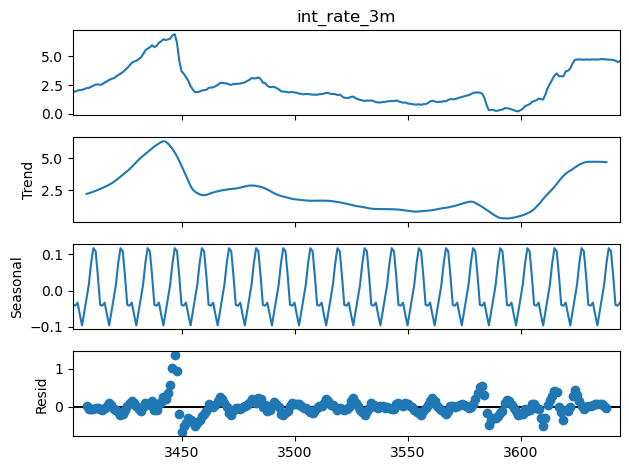

In [785]:
res = seasonal_decompose(oecd_ctry_norway['int_rate_3m'], model='additive', period=12)
res.plot(); plt.show()

In [787]:
# Check variables for deletion candidates
oecd_ctry_norway.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'cpi_rate', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'unemp_rate', 'population'],
      dtype='object')

In [789]:
# Create explicit copy before deletions to avoid the warning message "A value is trying to be set on a copy of a slice from a DataFrame"
# The 'deep=True' argument ensures that a completely independent of the DataFrame, including its data and index, is created
oecd_ctry_norway_copy = oecd_ctry_norway.copy(deep=True)

In [791]:
# Delete the 'cpi_rate' (as a redundant measure of 'cons_prices') variable from the subset dataframe copy
# This variable is not needed for the analysis going forward
oecd_ctry_norway_copy.drop(['cpi_rate'], axis=1, inplace=True)

In [794]:
# Check the dimensions
oecd_ctry_norway_copy.shape

(243, 21)

In [796]:
# Check the first 3 rows
oecd_ctry_norway_copy.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
3402,Norway,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,...,6.25,2.02,1.96,3.90,37.94,81.2,66924.0,2.7,4.5,4623293.0
3403,Norway,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,...,6.38,2.01,1.92,3.77,40.49,81.3,66924.0,2.7,4.4,4623293.0
3404,Norway,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,...,6.21,2.06,2.02,4.02,41.87,81.7,66924.0,2.7,4.6,4623293.0


#### Call the custom function defined earlier to transform each variable one-by-one, specifying the transformation method to apply
#### Methods are log returns, first differences of % values and % changes, for an annualized (12-period) timescale

In [799]:
oecd_ctry_norway_copy['fx_to_usd_logret12'] = transform_series(oecd_ctry_norway_copy['fx_to_usd'], method='log_return')
oecd_ctry_norway_copy['int_rate_ovn_diff'] = transform_series(oecd_ctry_norway_copy['int_rate_ovn'], method='diff')
oecd_ctry_norway_copy['int_rate_3m_diff'] = transform_series(oecd_ctry_norway_copy['int_rate_3m'], method='diff')
oecd_ctry_norway_copy['int_rate_10y_diff'] = transform_series(oecd_ctry_norway_copy['int_rate_10y'], method='diff')
oecd_ctry_norway_copy['stock_index_logret12'] = transform_series(oecd_ctry_norway_copy['stock_index'], method='log_return')
oecd_ctry_norway_copy['cons_prices_logret12'] = transform_series(oecd_ctry_norway_copy['cons_prices'], method='log_return')
oecd_ctry_norway_copy['gdp_pc_usd_logret12'] = transform_series(oecd_ctry_norway_copy['gdp_pc_usd'], method='log_return')
oecd_ctry_norway_copy['real_gdp_chg_pct_logret12'] = transform_series(oecd_ctry_norway_copy['real_gdp_chg_pct'], method='log_return_pct_chg')
oecd_ctry_norway_copy['unemp_rate_logret12'] = transform_series(oecd_ctry_norway_copy['unemp_rate'], method='log_return')
oecd_ctry_norway_copy['population_pct_chg'] = transform_series(oecd_ctry_norway_copy['population'], method='pct_change')

In [801]:
# Check the dimensions
oecd_ctry_norway_copy.shape

(243, 31)

In [803]:
# Check the last 3 rows
oecd_ctry_norway_copy.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
3642,Norway,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,0.087412,0.0,-0.10,0.38,0.128220,0.023213,0.034977,0.020783,-0.195745,0.008322
3643,Norway,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,0.059788,0.0,-0.20,0.18,0.158825,0.034909,0.034977,0.020783,0.082238,0.008322
3644,Norway,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,0.007512,0.0,-0.16,0.41,0.140900,0.026053,0.034977,0.020783,-0.051293,0.008322


In [805]:
# Check the first 3 rows
oecd_ctry_norway_copy.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
3402,Norway,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN
3403,Norway,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN
3404,Norway,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN


##### Convert those variables that are in a % format to a decimal format

In [808]:
# Call the custom function defined earlier to convert the transformed interest rate variables, which are in % format, to decimals
# Overwrite the relevant existing variables

columns_to_dec = ['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff']
convert_percent_to_decimal(oecd_ctry_norway_copy, columns_to_dec, overwrite=True)

In [811]:
# Check the dimensions
oecd_ctry_norway_copy.shape

(243, 31)

In [813]:
# Check the last 3 rows
oecd_ctry_norway_copy.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
3642,Norway,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,0.087412,0.0,-0.0010,0.0038,0.128220,0.023213,0.034977,0.020783,-0.195745,0.008322
3643,Norway,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,0.059788,0.0,-0.0020,0.0018,0.158825,0.034909,0.034977,0.020783,0.082238,0.008322
3644,Norway,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,0.007512,0.0,-0.0016,0.0041,0.140900,0.026053,0.034977,0.020783,-0.051293,0.008322


In [815]:
oecd_ctry_norway_copy.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'unemp_rate', 'population', 'fx_to_usd_logret12',
       'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg'],
      dtype='object')

#### Export the first-step transformed subset dataframe for Norway in a pickle format
#### This is for backup, before decomposing variables for stationarity checks and subsequent stationarization

In [818]:
oecd_ctry_norway_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'norway_pre_stat.pkl'))

#### Switzerland

In [821]:
# Create a subset dataframe filtered for the country 'Switzerland', include all original other variables in oecd_ctry
oecd_ctry_switzerland = oecd_ctry.loc[oecd_ctry['country'] == 'Switzerland', :]

In [823]:
# Check the dimensions
oecd_ctry_switzerland.shape

(243, 22)

In [825]:
# Check the first 3 rows
oecd_ctry_switzerland.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,cpi_rate,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
4617,Switzerland,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,...,0.60,0.65,2.25,63.48,96.61,1.20,56408.0,2.9,0.0,7437116.0
4618,Switzerland,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,...,0.63,0.68,2.38,65.20,96.82,1.41,56408.0,2.9,0.0,7437116.0
4619,Switzerland,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,...,0.75,0.67,2.36,66.06,97.06,1.44,56408.0,2.9,0.0,7437116.0


In [827]:
# Check the last 3 rows
oecd_ctry_switzerland.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,cpi_rate,gdp_pc_usd,real_gdp_chg_pct,unemp_rate,population
4857,Switzerland,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,0.23,0.41,0.38,134.25,107.07,0.40,104896.0,0.9,0.0,8967407.0
4858,Switzerland,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,0.20,0.37,0.40,142.16,107.67,0.32,104896.0,0.9,0.0,8967407.0
4859,Switzerland,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,0.15,0.31,0.51,143.33,107.72,0.34,104896.0,0.9,0.0,8967407.0


#### Descriptive statistics

In [830]:
# Output descriptive statistics on all numerical variables in the oecd_ctry_switzerland subset dataframe
# Comment: Adding the .map('{:.2f]'.format) changes the numbers to non-scientific notation, 2 decimals format
# Comment (cont.): ... it applies the format only to the output specifically, not to the global display settings

oecd_ctry_switzerland.describe(include=np.number).map('{:.2f}'.format).T

,count,mean,std,min,25%,50%,75%,max
year,243.00,2014.63,5.86,2005.00,2010.00,2015.00,2020.00,2025.00
month,243.00,6.44,3.47,1.00,3.00,6.00,9.00,12.00
fx_to_usd,243.00,1.00,0.12,0.78,0.92,0.97,1.04,1.31
int_rate_ovn,243.00,0.01,1.03,-3.65,-0.85,0.00,0.63,2.62
int_rate_3m,243.00,0.19,0.99,-0.93,-0.73,0.02,0.71,2.61
int_rate_10y,243.00,0.93,1.12,-0.98,-0.05,0.74,1.94,3.29
stock_index,243.00,98.47,23.24,52.76,77.83,97.43,118.03,147.23
cons_prices,243.00,101.46,2.43,96.61,100.22,101.17,101.86,107.99
cpi_rate,243.00,0.55,1.12,-1.44,-0.23,0.48,1.19,3.45
gdp_pc_usd,243.00,83237.53,12506.18,56408.00,76848.00,85562.00,90961.00,104896.00


#### Decomposition of time series data for a few variables to confirm trend behavior, seasonality, residuals profile

##### Decompose consumer price index time series data for the oecd_ctry_switzerland subset dataframe

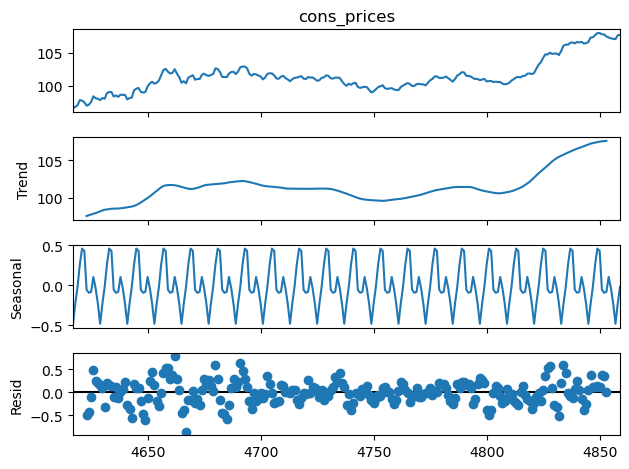

In [838]:
res = seasonal_decompose(oecd_ctry_switzerland['cons_prices'], model='additive', period=12)
res.plot(); plt.show()

##### Decompose 3-month interest rate time series data

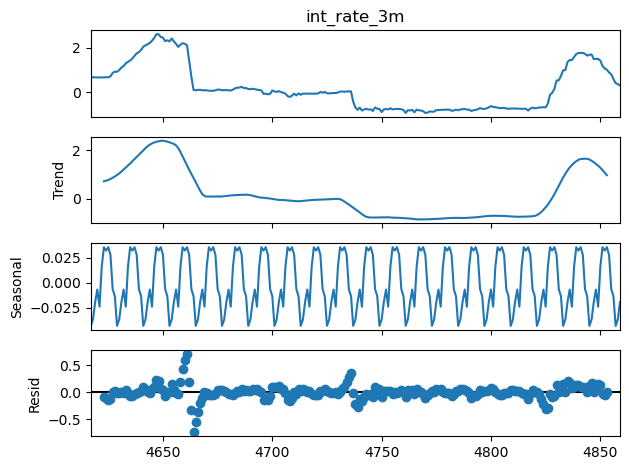

In [841]:
res = seasonal_decompose(oecd_ctry_switzerland['int_rate_3m'], model='additive', period=12)
res.plot(); plt.show()

In [843]:
# Check variables for deletion candidates
oecd_ctry_switzerland.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'cpi_rate', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'unemp_rate', 'population'],
      dtype='object')

In [845]:
# Create explicit copy before deletions to avoid the warning message "A value is trying to be set on a copy of a slice from a DataFrame"
# The 'deep=True' argument ensures that a completely independent of the DataFrame, including its data and index, is created
oecd_ctry_switzerland_copy = oecd_ctry_switzerland.copy(deep=True)

In [847]:
# Delete 'cons_prices' and 'unemp_rate' variables from the subset dataframe copy
# In the original raw dataset there was no data for 'unemp_rate' and 'cpi_rate' was redundant, so they are removed for analysis
oecd_ctry_switzerland_copy.drop(['cpi_rate', 'unemp_rate'], axis=1, inplace=True)

In [849]:
# Check the dimensions
oecd_ctry_switzerland_copy.shape

(243, 20)

In [851]:
# Check the first 3 rows
oecd_ctry_switzerland_copy.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,fx_to_usd,int_rate_ovn,int_rate_3m,int_rate_10y,stock_index,cons_prices,gdp_pc_usd,real_gdp_chg_pct,population
4617,Switzerland,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,False,1.18,0.60,0.65,2.25,63.48,96.61,56408.0,2.9,7437116.0
4618,Switzerland,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,False,1.19,0.63,0.68,2.38,65.20,96.82,56408.0,2.9,7437116.0
4619,Switzerland,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,False,1.18,0.75,0.67,2.36,66.06,97.06,56408.0,2.9,7437116.0


#### Call the custom function defined earlier to transform each variable one-by-one, specifying the transformation method to apply
#### Methods are log returns, first differences of % values and % changes, for an annualized (12-period) timescale

In [854]:
oecd_ctry_switzerland_copy['fx_to_usd_logret12'] = transform_series(oecd_ctry_switzerland_copy['fx_to_usd'], method='log_return')
oecd_ctry_switzerland_copy['int_rate_ovn_diff'] = transform_series(oecd_ctry_switzerland_copy['int_rate_ovn'], method='diff')
oecd_ctry_switzerland_copy['int_rate_3m_diff'] = transform_series(oecd_ctry_switzerland_copy['int_rate_3m'], method='diff')
oecd_ctry_switzerland_copy['int_rate_10y_diff'] = transform_series(oecd_ctry_switzerland_copy['int_rate_10y'], method='diff')
oecd_ctry_switzerland_copy['stock_index_logret12'] = transform_series(oecd_ctry_switzerland_copy['stock_index'], method='log_return')
oecd_ctry_switzerland_copy['cons_prices_logret12'] = transform_series(oecd_ctry_switzerland_copy['cons_prices'], method='log_return')
oecd_ctry_switzerland_copy['gdp_pc_usd_logret12'] = transform_series(oecd_ctry_switzerland_copy['gdp_pc_usd'], method='log_return')
oecd_ctry_switzerland_copy['real_gdp_chg_pct_logret12'] = transform_series(oecd_ctry_switzerland_copy['real_gdp_chg_pct'], method='log_return_pct_chg')
oecd_ctry_switzerland_copy['population_pct_chg'] = transform_series(oecd_ctry_switzerland_copy['population'], method='pct_change')

In [856]:
# Check the dimensions
oecd_ctry_switzerland_copy.shape

(243, 29)

In [858]:
# Check the last 3 rows
oecd_ctry_switzerland_copy.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,population_pct_chg
4857,Switzerland,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,8967407.0,0.056512,-1.22,-1.28,-0.45,0.061440,0.004024,0.003562,0.00896,0.005091
4858,Switzerland,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,8967407.0,0.022473,-1.30,-1.33,-0.43,0.110014,0.003256,0.003562,0.00896,0.005091
4859,Switzerland,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,8967407.0,-0.011300,-1.19,-1.19,-0.13,0.093164,0.003441,0.003562,0.00896,0.005091


In [860]:
# Check the first 3 rows
oecd_ctry_switzerland_copy.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,population_pct_chg
4617,Switzerland,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,...,7437116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028587,NaN
4618,Switzerland,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,...,7437116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028587,NaN
4619,Switzerland,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,...,7437116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028587,NaN


##### Convert those variables that are in a % format to a decimal format

In [863]:
# Call the custom function defined earlier to convert the transformed interest rate variables, which are in % format, to decimals
# Overwrite the relevant existing variables

columns_to_dec = ['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff']
convert_percent_to_decimal(oecd_ctry_switzerland_copy, columns_to_dec, overwrite=True)

In [866]:
# Check the dimensions
oecd_ctry_switzerland_copy.shape

(243, 29)

In [868]:
# Check the last 3 rows
oecd_ctry_switzerland_copy.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,population_pct_chg
4857,Switzerland,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,8967407.0,0.056512,-0.0122,-0.0128,-0.0045,0.061440,0.004024,0.003562,0.00896,0.005091
4858,Switzerland,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,8967407.0,0.022473,-0.0130,-0.0133,-0.0043,0.110014,0.003256,0.003562,0.00896,0.005091
4859,Switzerland,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,8967407.0,-0.011300,-0.0119,-0.0119,-0.0013,0.093164,0.003441,0.003562,0.00896,0.005091


In [870]:
oecd_ctry_switzerland_copy.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'population', 'fx_to_usd_logret12',
       'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'population_pct_chg'],
      dtype='object')

#### Export the first-step transformed subset dataframe for Switzerland in a pickle format
#### This is for backup, before decomposing variables for stationarity checks and subsequent stationarization

In [874]:
oecd_ctry_switzerland_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'switzerland_pre_stat.pkl'))

#### FX pairs, VIX and commodities 

In [885]:
# Check the dimensions
fx_vix_comm.shape

(244, 42)

In [892]:
# Check variable names
fx_vix_comm.columns

Index(['timestamp', 'year', 'month', 'year_month', 'month_text', 'gfc_flag',
       'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',
       'aud_cad', 'aud_jpy', 'chf_aud', 'chf_cad', 'chf_jpy', 'eur_aud',
       'eur_cad', 'eur_chf', 'eur_gbp', 'eur_jpy', 'eur_usd', 'gbp_aud',
       'gbp_cad', 'gbp_jpy', 'gbp_usd', 'usd_aud', 'usd_cad', 'usd_chf',
       'usd_jpy', 'vix_avg', 'all_comm_idx_avg', 'energy_idx_avg', 'wti_avg',
       'brent_avg', 'nat_gas_eu_avg', 'lng_asia_avg', 'metals_idx_avg',
       'iron_ore_avg', 'copper_avg', 'aluminum_avg', 'gold_oz_usd',
       'food_idx_avg'],
      dtype='object')

In [887]:
# Check the first 3 rows
fx_vix_comm.head(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg,brent_avg,nat_gas_eu_avg,lng_asia_avg,metals_idx_avg,iron_ore_avg,copper_avg,aluminum_avg,gold_oz_usd,food_idx_avg
0,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,False,...,46.84,44.17,5.06,5.82,77.73,28.11,3168.1,1836.18,424.03,76.51
1,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,False,...,47.97,45.72,5.06,6.10,80.01,28.11,3247.1,1882.78,423.35,79.02
2,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,False,...,54.31,53.23,5.06,6.46,82.99,28.11,3378.9,1987.50,433.85,80.94


In [900]:
# Check middle columns of first 3 rows
fx_vix_comm.iloc[0:3,9:29]

,boj_int_rate_flag,aud_cad,aud_jpy,chf_aud,chf_cad,chf_jpy,eur_aud,eur_cad,eur_chf,eur_gbp,eur_jpy,eur_usd,gbp_aud,gbp_cad,gbp_jpy,gbp_usd,usd_aud,usd_cad,usd_chf,usd_jpy
0,False,0.93,78.33,1.12,1.04,87.88,1.74,1.61,1.55,0.71,135.87,1.33,2.46,2.28,192.42,1.88,1.31,1.21,1.16,102.28
1,False,0.97,82.00,1.07,1.04,88.04,1.66,1.61,1.55,0.69,136.50,1.30,2.41,2.34,197.95,1.88,1.28,1.24,1.19,105.02
2,False,0.96,82.60,1.08,1.04,89.57,1.68,1.61,1.55,0.69,138.80,1.32,2.43,2.32,200.39,1.91,1.27,1.22,1.17,105.15


In [904]:
# Check more middle columns of first 3 rows
fx_vix_comm.iloc[0:3,28:33]

,usd_jpy,vix_avg,all_comm_idx_avg,energy_idx_avg,wti_avg
0,102.28,13.44,85.47,108.96,46.84
1,105.02,11.71,87.43,110.97,47.97
2,105.15,13.13,94.60,124.99,54.31


In [10]:
# Check the last 3 rows
fx_vix_comm.tail(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg,brent_avg,nat_gas_eu_avg,lng_asia_avg,metals_idx_avg,iron_ore_avg,copper_avg,aluminum_avg,gold_oz_usd,food_idx_avg
240,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,True,...,75.74,78.19,14.76,14.13,181.19,103.78,8976.68,2571.37,2709.69,135.64
241,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,True,...,71.53,75.19,15.33,14.72,186.29,108.20,9330.98,2655.77,2894.73,132.05
242,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,True,...,68.24,71.74,13.13,13.12,187.31,103.65,9735.82,2651.60,2983.30,128.97


In [908]:
# Check middle columns of last 3 rows
fx_vix_comm.iloc[241:244,9:29]

,boj_int_rate_flag,aud_cad,aud_jpy,chf_aud,chf_cad,chf_jpy,eur_aud,eur_cad,eur_chf,eur_gbp,eur_jpy,eur_usd,gbp_aud,gbp_cad,gbp_jpy,gbp_usd,usd_aud,usd_cad,usd_chf,usd_jpy
241,True,0.90,95.68,1.76,1.58,167.98,1.65,1.49,0.94,0.83,158.12,1.04,1.99,1.79,190.29,1.25,1.59,1.43,0.90,151.73
242,True,0.90,93.84,1.80,1.63,168.62,1.72,1.55,0.96,0.84,161.09,1.08,2.05,1.85,192.28,1.29,1.59,1.44,0.88,149.10
243,True,0.88,90.60,1.91,1.68,173.03,1.79,1.57,0.94,0.86,161.97,1.12,2.09,1.83,189.32,1.31,1.59,1.40,0.84,144.46


In [910]:
# Check more middle columns of last 3 rows
fx_vix_comm.iloc[241:244,28:33]

,usd_jpy,vix_avg,all_comm_idx_avg,energy_idx_avg,wti_avg
241,151.73,16.97,171.96,183.07,71.53
242,149.10,21.84,167.37,172.72,68.24
243,144.46,33.18,NaN,NaN,NaN


#### Delete last row of fx_vix_comm to ensure all variables have data values through the temporal end month (Mar 2025)
##### This will also ensure the temporal period matches that of the oecd_ctry subset dataframes

In [955]:
fx_vix_comm.drop(fx_vix_comm.tail(1).index, inplace=True)

In [988]:
# Check the dimensions
fx_vix_comm.shape

(243, 42)

In [961]:
# Check the last 3 rows
fx_vix_comm.tail(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg,brent_avg,nat_gas_eu_avg,lng_asia_avg,metals_idx_avg,iron_ore_avg,copper_avg,aluminum_avg,gold_oz_usd,food_idx_avg
240,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,True,...,75.74,78.19,14.76,14.13,181.19,103.78,8976.68,2571.37,2709.69,135.64
241,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,True,...,71.53,75.19,15.33,14.72,186.29,108.20,9330.98,2655.77,2894.73,132.05
242,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,True,...,68.24,71.74,13.13,13.12,187.31,103.65,9735.82,2651.60,2983.30,128.97


#### Export the modified fx_vix_comm dataframe as backup

In [964]:
fx_vix_comm.to_pickle(os.path.join(path, 'Data','Prepared Data', 'fx_vix_comm_clean.pkl'))

#### Descriptive statistics

In [966]:
# Output descriptive statistics on all numerical variables in the fx_vix_comm dataframe
# Comment: Adding the .map('{:.2f]'.format) changes the numbers to non-scientific notation, 2 decimals format
# Comment (cont.): ... it applies the format only to the output specifically, not to the global display settings

fx_vix_comm.describe(include=np.number).map('{:.2f}'.format).T

,count,mean,std,min,25%,50%,75%,max
year,243.00,2014.63,5.86,2005.00,2010.00,2015.00,2020.00,2025.00
month,243.00,6.44,3.47,1.00,3.00,6.00,9.00,12.00
aud_cad,243.00,0.94,0.06,0.80,0.90,0.94,0.98,1.07
aud_jpy,243.00,86.35,8.82,60.16,80.59,85.44,93.56,105.52
chf_aud,243.00,1.29,0.23,0.95,1.06,1.31,1.46,1.80
chf_cad,243.00,1.21,0.21,0.83,1.04,1.28,1.36,1.63
chf_jpy,243.00,111.47,24.14,79.52,90.91,110.02,118.83,176.72
eur_aud,243.00,1.55,0.14,1.18,1.46,1.58,1.64,2.01
eur_cad,243.00,1.46,0.08,1.23,1.40,1.46,1.51,1.66
eur_chf,243.00,1.23,0.22,0.93,1.08,1.17,1.48,1.67


#### Decomposition of time series data for some variables to confirm trend behavior, seasonality, residuals profile

##### Decompose aud_jpy time series data for the fx_vix_comm dataframe

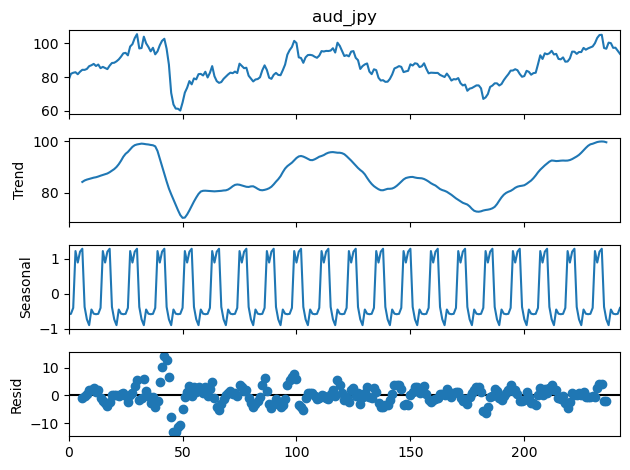

In [968]:
res = seasonal_decompose(fx_vix_comm['aud_jpy'], model='additive', period=12)
res.plot(); plt.show()

##### Decompose eur_usd time series data for the fx_vix_comm dataframe

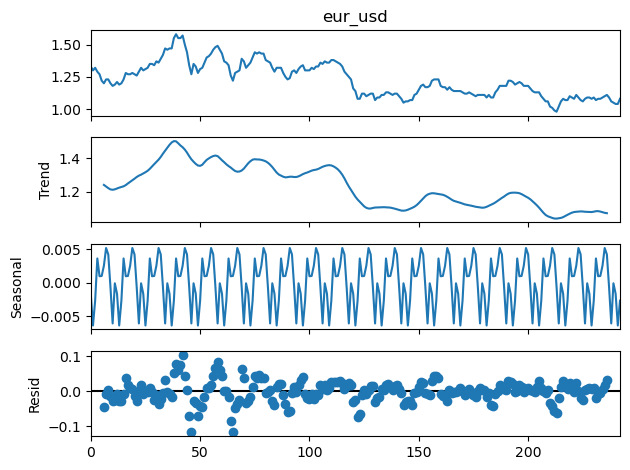

In [970]:
res = seasonal_decompose(fx_vix_comm['eur_usd'], model='additive', period=12)
res.plot(); plt.show()

##### Decompose chf_jpy time series data for the fx_vix_comm dataframe

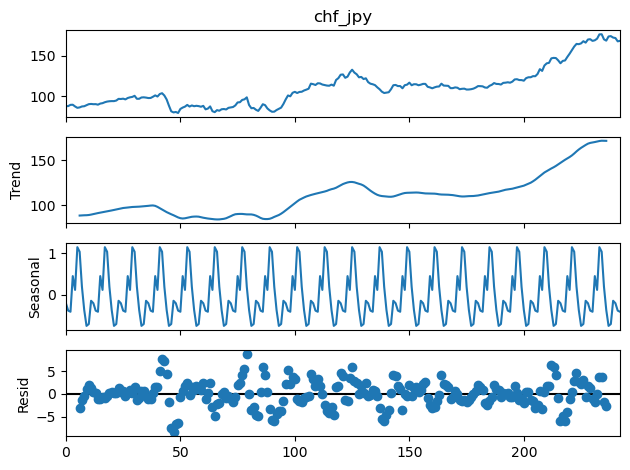

In [972]:
res = seasonal_decompose(fx_vix_comm['chf_jpy'], model='additive', period=12)
res.plot(); plt.show()

##### Decompose usd_chf time series data for the fx_vix_comm dataframe

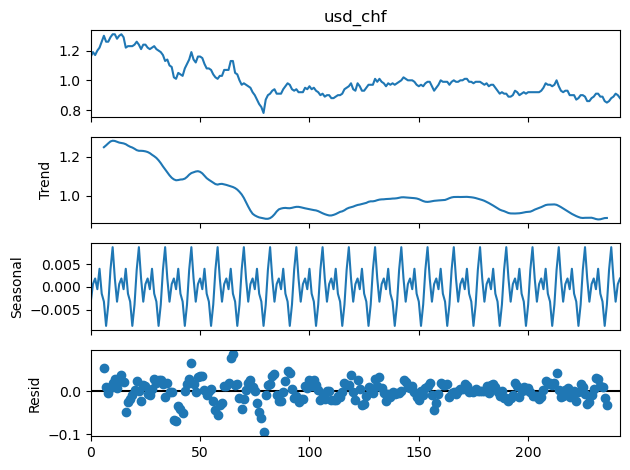

In [974]:
res = seasonal_decompose(fx_vix_comm['usd_chf'], model='additive', period=12)
res.plot(); plt.show()

##### Decompose vix_avg time series data for the fx_vix_comm dataframe

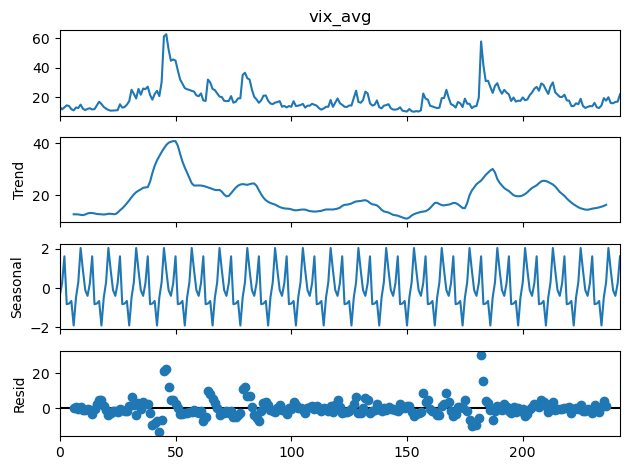

In [976]:
res = seasonal_decompose(fx_vix_comm['vix_avg'], model='additive', period=12)
res.plot(); plt.show()

##### Decompose all_comm_idx_avg time series data for the fx_vix_comm dataframe

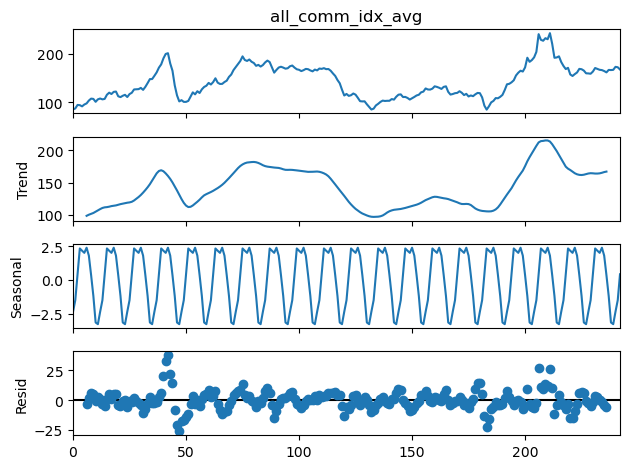

In [978]:
res = seasonal_decompose(fx_vix_comm['all_comm_idx_avg'], model='additive', period=12)
res.plot(); plt.show()

##### Decompose metals_idx_avg time series data for the fx_vix_comm dataframe

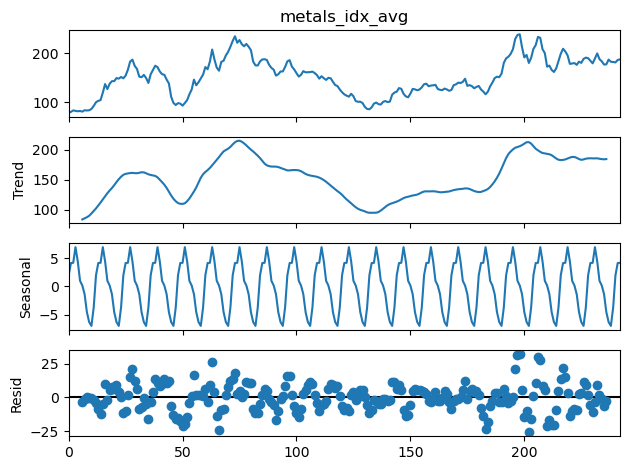

In [980]:
res = seasonal_decompose(fx_vix_comm['metals_idx_avg'], model='additive', period=12)
res.plot(); plt.show()

##### Decompose iron_ore_avg time series data for the fx_vix_comm dataframe

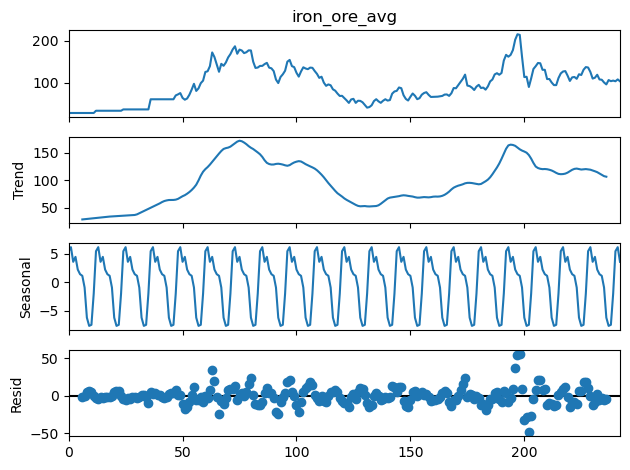

In [982]:
res = seasonal_decompose(fx_vix_comm['iron_ore_avg'], model='additive', period=12)
res.plot(); plt.show()

##### Decompose gold_oz_usd time series data for the fx_vix_comm dataframe

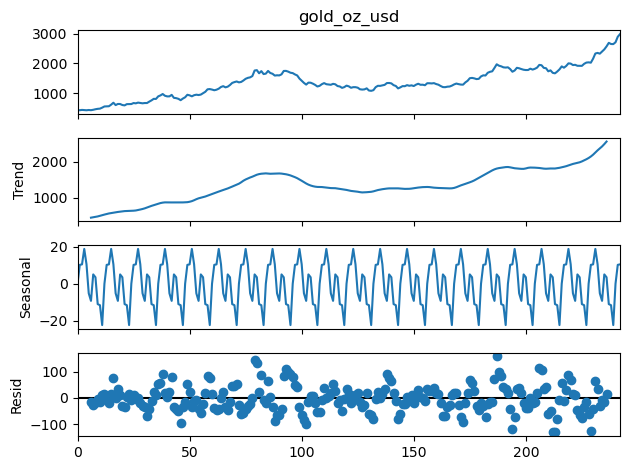

In [984]:
res = seasonal_decompose(fx_vix_comm['gold_oz_usd'], model='additive', period=12)
res.plot(); plt.show()

##### Decompose food_idx_avg time series data for the fx_vix_comm dataframe

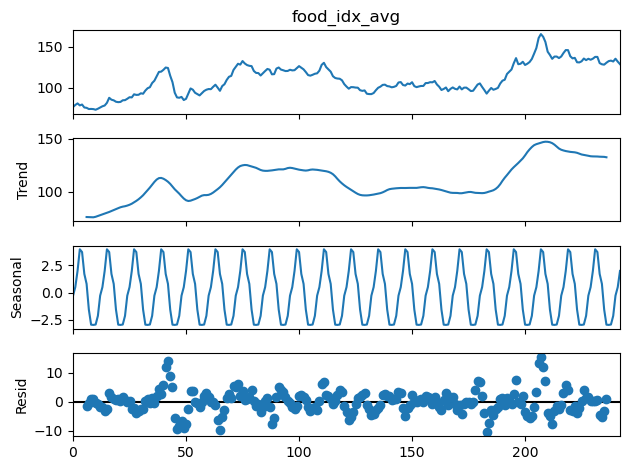

In [986]:
res = seasonal_decompose(fx_vix_comm['food_idx_avg'], model='additive', period=12)
res.plot(); plt.show()

In [995]:
# Create explicit copy of fx_vix_comm dataframe before first-step transformation of its numerical variables
# The 'deep=True' argument ensures that a completely independent of the DataFrame, including its data and index, is created
fx_vix_comm_copy = fx_vix_comm.copy(deep=True)

In [997]:
# Check the dimensions
fx_vix_comm_copy.shape

(243, 42)

In [999]:
# Check the last 3 rows
fx_vix_comm_copy.tail(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg,brent_avg,nat_gas_eu_avg,lng_asia_avg,metals_idx_avg,iron_ore_avg,copper_avg,aluminum_avg,gold_oz_usd,food_idx_avg
240,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,True,...,75.74,78.19,14.76,14.13,181.19,103.78,8976.68,2571.37,2709.69,135.64
241,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,True,...,71.53,75.19,15.33,14.72,186.29,108.20,9330.98,2655.77,2894.73,132.05
242,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,True,...,68.24,71.74,13.13,13.12,187.31,103.65,9735.82,2651.60,2983.30,128.97


#### Call the custom function defined earlier to transform each variable one-by-one, specifying the transformation method to apply¶
#### Method will be log returns, for an annualized (12-period) timescale

In [1007]:
fx_vix_comm_copy['aud_cad_logret12'] = transform_series(fx_vix_comm_copy['aud_cad'], method='log_return')
fx_vix_comm_copy['aud_jpy_logret12'] = transform_series(fx_vix_comm_copy['aud_jpy'], method='log_return')
fx_vix_comm_copy['chf_aud_logret12'] = transform_series(fx_vix_comm_copy['chf_aud'], method='log_return')
fx_vix_comm_copy['chf_cad_logret12'] = transform_series(fx_vix_comm_copy['chf_cad'], method='log_return')
fx_vix_comm_copy['chf_jpy_logret12'] = transform_series(fx_vix_comm_copy['chf_jpy'], method='log_return')
fx_vix_comm_copy['eur_aud_logret12'] = transform_series(fx_vix_comm_copy['eur_aud'], method='log_return')
fx_vix_comm_copy['eur_cad_logret12'] = transform_series(fx_vix_comm_copy['eur_cad'], method='log_return')
fx_vix_comm_copy['eur_chf_logret12'] = transform_series(fx_vix_comm_copy['eur_chf'], method='log_return')
fx_vix_comm_copy['eur_gbp_logret12'] = transform_series(fx_vix_comm_copy['eur_gbp'], method='log_return')
fx_vix_comm_copy['eur_jpy_logret12'] = transform_series(fx_vix_comm_copy['eur_jpy'], method='log_return')
fx_vix_comm_copy['eur_usd_logret12'] = transform_series(fx_vix_comm_copy['eur_usd'], method='log_return')
fx_vix_comm_copy['gbp_aud_logret12'] = transform_series(fx_vix_comm_copy['gbp_aud'], method='log_return')
fx_vix_comm_copy['gbp_cad_logret12'] = transform_series(fx_vix_comm_copy['gbp_cad'], method='log_return')
fx_vix_comm_copy['gbp_jpy_logret12'] = transform_series(fx_vix_comm_copy['gbp_jpy'], method='log_return')
fx_vix_comm_copy['gbp_usd_logret12'] = transform_series(fx_vix_comm_copy['gbp_usd'], method='log_return')
fx_vix_comm_copy['usd_aud_logret12'] = transform_series(fx_vix_comm_copy['usd_aud'], method='log_return')
fx_vix_comm_copy['usd_cad_logret12'] = transform_series(fx_vix_comm_copy['usd_cad'], method='log_return')
fx_vix_comm_copy['usd_chf_logret12'] = transform_series(fx_vix_comm_copy['usd_chf'], method='log_return')
fx_vix_comm_copy['usd_jpy_logret12'] = transform_series(fx_vix_comm_copy['usd_jpy'], method='log_return')
fx_vix_comm_copy['vix_avg_logret12'] = transform_series(fx_vix_comm_copy['vix_avg'], method='log_return')
fx_vix_comm_copy['all_comm_idx_avg_logret12'] = transform_series(fx_vix_comm_copy['all_comm_idx_avg'], method='log_return')
fx_vix_comm_copy['energy_idx_avg_logret12'] = transform_series(fx_vix_comm_copy['energy_idx_avg'], method='log_return')
fx_vix_comm_copy['wti_avg_logret12'] = transform_series(fx_vix_comm_copy['wti_avg'], method='log_return')
fx_vix_comm_copy['brent_avg_logret12'] = transform_series(fx_vix_comm_copy['brent_avg'], method='log_return')
fx_vix_comm_copy['nat_gas_eu_avg_logret12'] = transform_series(fx_vix_comm_copy['nat_gas_eu_avg'], method='log_return')
fx_vix_comm_copy['lng_asia_avg_logret12'] = transform_series(fx_vix_comm_copy['lng_asia_avg'], method='log_return')
fx_vix_comm_copy['metals_idx_avg_logret12'] = transform_series(fx_vix_comm_copy['metals_idx_avg'], method='log_return')
fx_vix_comm_copy['iron_ore_avg_logret12'] = transform_series(fx_vix_comm_copy['iron_ore_avg'], method='log_return')
fx_vix_comm_copy['copper_avg_logret12'] = transform_series(fx_vix_comm_copy['copper_avg'], method='log_return')
fx_vix_comm_copy['aluminum_avg_logret12'] = transform_series(fx_vix_comm_copy['aluminum_avg'], method='log_return')
fx_vix_comm_copy['gold_oz_usd_logret12'] = transform_series(fx_vix_comm_copy['gold_oz_usd'], method='log_return')
fx_vix_comm_copy['food_idx_avg_logret12'] = transform_series(fx_vix_comm_copy['food_idx_avg'], method='log_return')

In [1009]:
# Check the dimensions
fx_vix_comm_copy.shape

(243, 74)

In [1011]:
# Check the last 3 rows
fx_vix_comm_copy.tail(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
240,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,True,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
241,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,True,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
242,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,True,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [1015]:
# Check middle columns of last 3 rows
fx_vix_comm_copy.iloc[240:243, 10:30]

,aud_cad,aud_jpy,chf_aud,chf_cad,chf_jpy,eur_aud,eur_cad,eur_chf,eur_gbp,eur_jpy,eur_usd,gbp_aud,gbp_cad,gbp_jpy,gbp_usd,usd_aud,usd_cad,usd_chf,usd_jpy,vix_avg
240,0.9,97.48,1.77,1.58,172.07,1.66,1.49,0.94,0.84,162.20,1.04,1.98,1.78,193.33,1.23,1.61,1.44,0.91,156.57,16.76
241,0.9,95.68,1.76,1.58,167.98,1.65,1.49,0.94,0.83,158.12,1.04,1.99,1.79,190.29,1.25,1.59,1.43,0.90,151.73,16.97
242,0.9,93.84,1.80,1.63,168.62,1.72,1.55,0.96,0.84,161.09,1.08,2.05,1.85,192.28,1.29,1.59,1.44,0.88,149.10,21.84


In [1019]:
# Check more middle columns of last 3 rows
fx_vix_comm_copy.iloc[240:243, 29:49]

,vix_avg,all_comm_idx_avg,energy_idx_avg,wti_avg,brent_avg,nat_gas_eu_avg,lng_asia_avg,metals_idx_avg,iron_ore_avg,copper_avg,aluminum_avg,gold_oz_usd,food_idx_avg,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,chf_jpy_logret12,eur_aud_logret12,eur_cad_logret12
240,16.76,172.78,188.62,75.74,78.19,14.76,14.13,181.19,103.78,8976.68,2571.37,2709.69,135.64,0.011173,0.004112,0.011364,0.012739,0.010516,0.012121,0.020340
241,16.97,171.96,183.07,71.53,75.19,15.33,14.72,186.29,108.20,9330.98,2655.77,2894.73,132.05,0.022473,-0.020073,0.005698,0.025642,-0.015594,0.000000,0.020340
242,21.84,167.37,172.72,68.24,71.74,13.13,13.12,187.31,103.65,9735.82,2651.60,2983.30,128.97,0.011173,-0.045619,0.045462,0.069870,0.000415,0.035507,0.052993


In [1023]:
# Check more middle columns of last 3 rows
fx_vix_comm_copy.iloc[240:243, 48:65]

,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12,eur_usd_logret12,gbp_aud_logret12,gbp_cad_logret12,gbp_jpy_logret12,gbp_usd_logret12,usd_aud_logret12,usd_cad_logret12,usd_chf_logret12,usd_jpy_logret12,vix_avg_logret12,all_comm_idx_avg_logret12,energy_idx_avg_logret12,wti_avg_logret12
240,0.020340,0.000000,-0.023530,0.017037,-0.046957,0.035994,0.040120,0.040320,-0.032003,0.064125,0.071973,0.056512,0.068870,0.224487,0.081167,0.082635,0.021216
241,0.020340,-0.010582,-0.023811,-0.021275,-0.037740,0.025447,0.051587,0.006908,-0.007968,0.038466,0.057570,0.022473,0.013870,0.193819,0.080687,0.055248,-0.076930
242,0.052993,-0.010363,-0.023530,-0.010866,-0.009217,0.055152,0.072861,0.010141,0.015625,0.038466,0.064539,-0.011300,-0.004817,0.459799,0.025966,-0.040285,-0.174869


In [1025]:
# Check the first 3 rows
fx_vix_comm_copy.head(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1028]:
fx_vix_comm_copy.columns

Index(['timestamp', 'year', 'month', 'year_month', 'month_text', 'gfc_flag',
       'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',
       'aud_cad', 'aud_jpy', 'chf_aud', 'chf_cad', 'chf_jpy', 'eur_aud',
       'eur_cad', 'eur_chf', 'eur_gbp', 'eur_jpy', 'eur_usd', 'gbp_aud',
       'gbp_cad', 'gbp_jpy', 'gbp_usd', 'usd_aud', 'usd_cad', 'usd_chf',
       'usd_jpy', 'vix_avg', 'all_comm_idx_avg', 'energy_idx_avg', 'wti_avg',
       'brent_avg', 'nat_gas_eu_avg', 'lng_asia_avg', 'metals_idx_avg',
       'iron_ore_avg', 'copper_avg', 'aluminum_avg', 'gold_oz_usd',
       'food_idx_avg', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_c

#### Export the first-step transformed dataframe for fx_vix_comm in a pickle format
#### This is for backup, before decomposing variables for stationarity checks and subsequent stationarization

In [1030]:
fx_vix_comm_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'fx_vix_comm_pre_stat.pkl'))